# Insurance Claim Fraud Detection

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset

inds = pd.read_csv('AutomobileInsurance.csv')
inds

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

As per above we can see that this dataset contain 1000 rows and 40 columns.

# Performing EDA

In [3]:
inds.shape

(1000, 40)

In [4]:
inds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
inds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
inds.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

as per above we can see that there 3 type of data present in the dataset(int,float,object).

In [7]:
# Dropping column which is not needed

inds.drop('_c39',axis=1,inplace=True)

In [8]:
# Checking null value 

inds.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

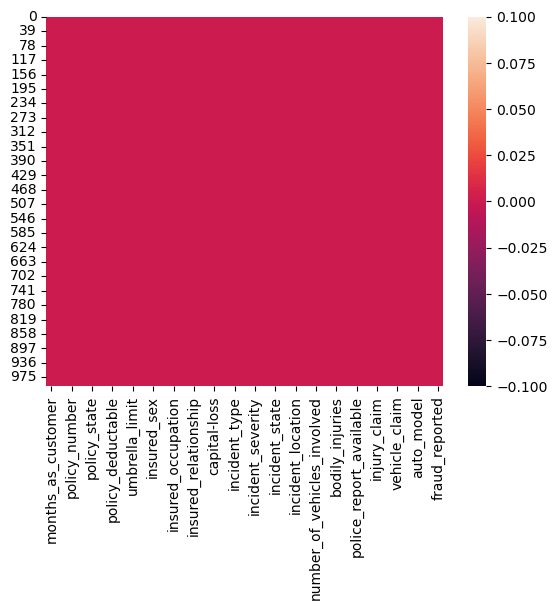

In [9]:
# heatmap for null value 

sns.heatmap(inds.isnull())

as per above we can see that there is no null value present in the dataset.

# Seperating Numerical and Categorical columns

In [10]:
# Categorical colums

categorical =[]
for i in inds.dtypes.index:
    if inds.dtypes[i] == 'object':
        categorical.append(i)
    print('Categorical columns:',categorical)

Categorical columns: []
Categorical columns: []
Categorical columns: []
Categorical columns: ['policy_bind_date']
Categorical columns: ['policy_bind_date', 'policy_state']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation']
Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupati

In [11]:
# Numerical columns

numerical =[]
for i in inds.dtypes.index:
    if inds.dtypes[i] != 'object':
        numerical.append(i)
    print('Numerical columns:',numerical)

Numerical columns: ['months_as_customer']
Numerical columns: ['months_as_customer', 'age']
Numerical columns: ['months_as_customer', 'age', 'policy_number']
Numerical columns: ['months_as_customer', 'age', 'policy_number']
Numerical columns: ['months_as_customer', 'age', 'policy_number']
Numerical columns: ['months_as_customer', 'age', 'policy_number']
Numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable']
Numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium']
Numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit']
Numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip']
Numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip']
Numerical columns: ['month

# Converting Categorical data into numerical data.

In [12]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
columns=['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

inds[columns] = inds[columns].apply(le.fit_transform)
inds

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851               487             2   
996                 285   41         186934               129             0   
997                 130   34         918516               509             2   
998                 458   62         533940               573             0   
999                 456   60         556080               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
4             2               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        2               71610   
1         468176  ...          0                        0                5070   
2         430632  ...          3                        1               34650   
3         608117  ...          2                        1               63400   
4         610706  ...          1                        1                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        0               87200   
996       608177  ...          3                        0              108480   
997       442797  ...          3                        2               67500   
998       441714  ...          1                        2               46980   
999       612260  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080         10           1   
1             780             780           3510          8          12   
2            7700            3850          23100          4          30   
3            6340            6340          50720          3          34   
4            1300             650           4550          0          31   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040          6           6   
996         18080           18080          72320         13          28   
997          7500            7500          52500         11          19   
998          5220            5220          36540          1           5   
999           460             920           3680          8          12   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006            

In [15]:
inds.describe()

months_as_customer          age  policy_number  policy_bind_date  \
count         1000.000000  1000.000000    1000.000000       1000.000000   
mean           203.954000    38.948000  546238.648000        474.332000   
std            115.113174     9.140287  257063.005276        275.402851   
min              0.000000    19.000000  100804.000000          0.000000   
25%            115.750000    32.000000  335980.250000        233.750000   
50%            199.500000    38.000000  533135.000000        472.500000   
75%            276.250000    44.000000  759099.750000        713.250000   
max            479.000000    64.000000  999435.000000        950.000000   

       policy_state   policy_csl  policy_deductable  policy_annual_premium  \
count    1000.00000  1000.000000        1000.000000            1000.000000   
mean        1.01400     0.951000        1136.000000            1256.406150   
std         0.83096     0.804516         611.864673             244.167395   
min         0.00000     0.000000         500.000000             433.330000   
25%         0.00000     0.000000         500.000000            1089.607500   
50%         1.00000     1.000000        1000.000000            1257.200000   
75%         2.00000     2.000000        2000.000000            1415.695000   
max         2.00000     2.000000        2000.000000            2047.590000   

       umbrella_limit    insured_zip  ...    witnesses  \
count    1.000000e+03    1000.000000  ...  1000.000000   
mean     1.101000e+06  501214.488000  ...     1.487000   
std      2.297407e+06   71701.610941  ...     1.111335   
min     -1.000000e+06  430104.000000  ...     0.000000   
25%      0.000000e+00  448404.500000  ...     1.000000   
50%      0.000000e+00  466445.500000  ...     1.000000   
75%      0.000000e+00  603251.000000  ...     2.000000   
max      1.000000e+07  620962.000000  ...     3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count              1000.000000          1000.00000   1000.000000   
mean                  0.971000         52761.94000   7433.420000   
std                   0.810442         26401.53319   4880.951853   
min                   0.000000           100.00000      0.000000   
25%                   0.000000         41812.50000   4295.000000   
50%                   1.000000         58055.00000   6775.000000   
75%                   2.000000         70592.50000  11305.000000   
max                   2.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make   auto_model    auto_year  \
count     1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean      7399.570000   37928.950000     6.546000    19.318000  2005.103000   
std       4824.726179   18886.252893     4.034869    11.136107     6.015861   
min          0.000000      70.000000     0.000000     0.000000  1995.000000   
25%       4445.000000   30292.500000     3.000000    10.000000  2000.000000   
50%       6750.000000   42100.000000     7.000000    20.000000  2005.000000   
75%      10885.000000   50822.500000    10.000000    29.000000  2010.000000   
max      23670.000000   79560.000000    13.000000    38.000000  2015.000000   

       fraud_reported  
count     1000.000000  
mean         0.247000  
std          0.431483  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 39 columns]

It is the statistical presentation of numerical columns.

As per above data we can see that there is some differene between mean and median.

Here we can also see that there is difference between max and 75% , means there is some outlier present in the dataset.

In [16]:
# checking number of unique values in each column

inds.nunique().to_frame('No. of unique values')

No. of unique values
months_as_customer                            391
age                                            46
policy_number                                1000
policy_bind_date                              951
policy_state                                    3
policy_csl                                      3
policy_deductable                               3
policy_annual_premium                         991
umbrella_limit                                 11
insured_zip                                   995
insured_sex                                     2
insured_education_level                         7
insured_occupation                             14
insured_hobbies                                20
insured_relationship                            6
capital-gains                                 338
capital-loss                                  354
incident_date                                  60
incident_type                                   4
collision_type                                  4
incident_severity                               4
authorities_contacted                           5
incident_state                                  7
incident_city                                   7
incident_location                            1000
incident_hour_of_the_day                       24
number_of_vehicles_involved                     4
property_damage                                 3
bodily_injuries                                 3
witnesses                                       4
police_report_available                         3
total_claim_amount                            763
injury_claim                                  638
property_claim                                626
vehicle_claim                                 726
auto_make                                      14
auto_model                                     39
auto_year                                      21
fraud_reported                                  2

# Data Visualization

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


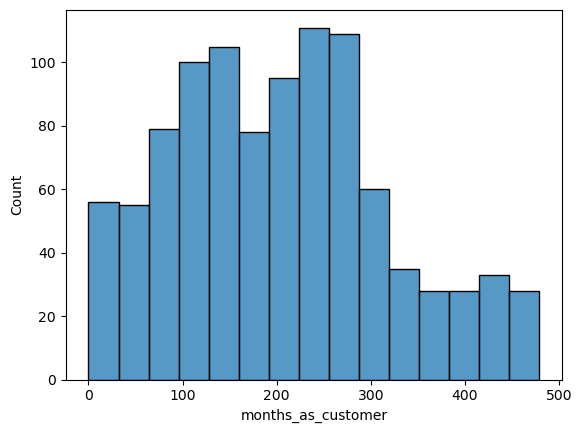

In [20]:
sns.histplot(inds['months_as_customer'] , palette='bright' )
print(inds['months_as_customer'].value_counts())

In the above plot we see that maximum customer is in between 200 to 300.

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


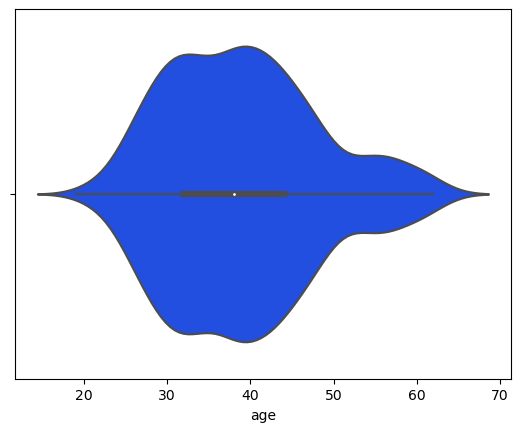

In [22]:
sns.violinplot(inds['age'] , palette='bright' )
print(inds['age'].value_counts())

In this plot we see that maximum of age is in between 30 to 40.

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


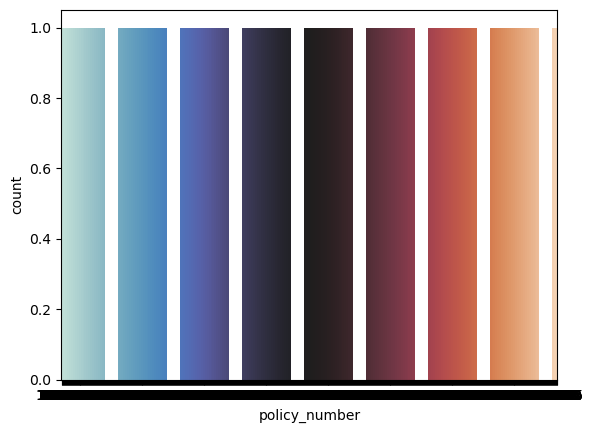

In [5]:
sns.countplot(inds['policy_number'] , palette='icefire' )
print(inds['policy_number'].value_counts())

In the above plot we see that policy number is equal for all.

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64


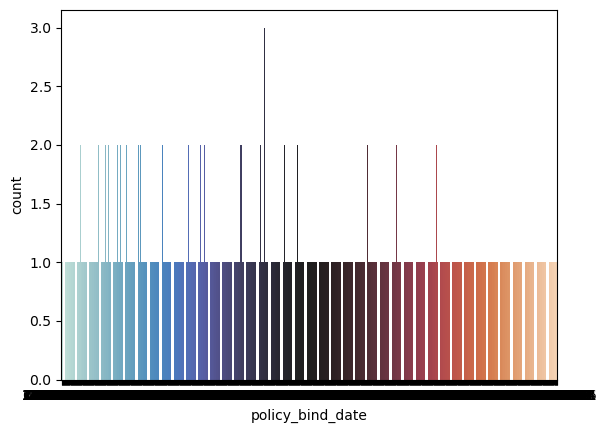

In [11]:
sns.countplot(inds['policy_bind_date'] , palette='icefire' )
print(inds['policy_bind_date'].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


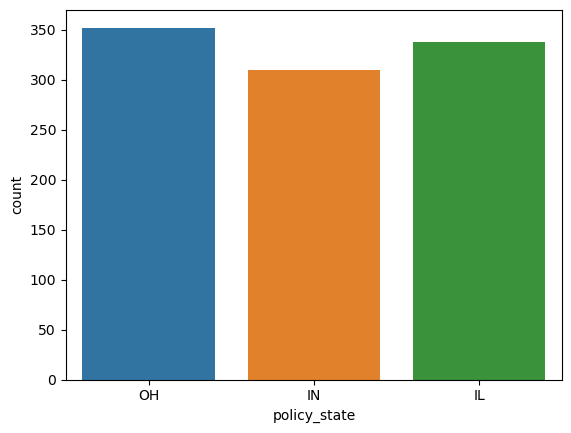

In [14]:
sns.countplot(inds['policy_state'] )
print(inds['policy_state'].value_counts())

In this plot we can see that policy_state OH is highest.

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


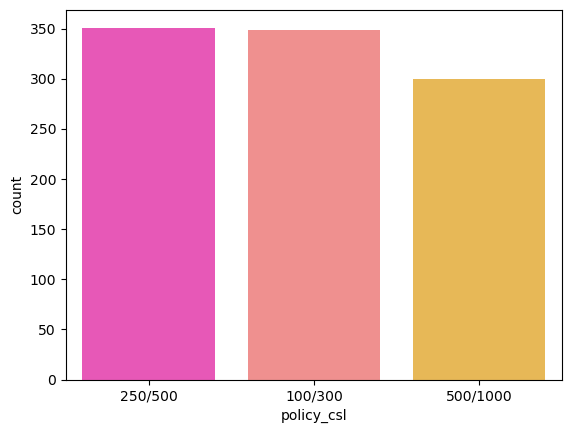

In [4]:
sns.countplot(inds['policy_csl'] ,palette='spring')
print(inds['policy_csl'].value_counts())

In this plot we can see that policy_csl at 250/500 .

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


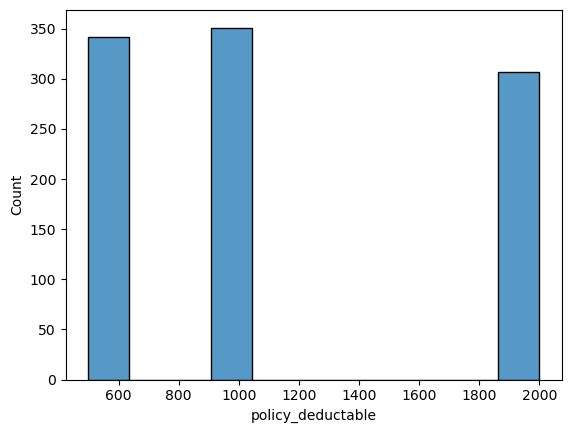

In [5]:
sns.histplot(inds['policy_deductable'] , palette='icefire' )
print(inds['policy_deductable'].value_counts())

As per above plot we policy_deductable has maximum value at 600 , 1000 and 2000. see that 

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


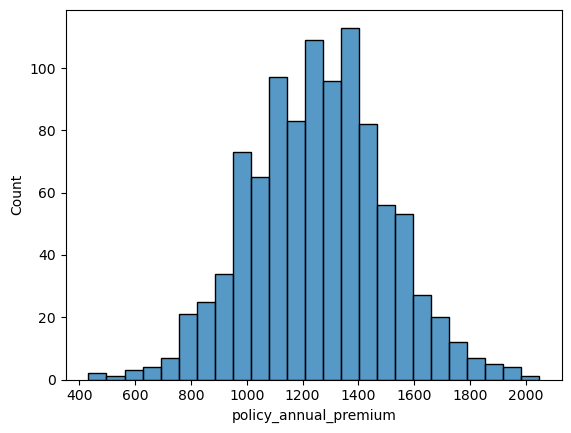

In [7]:
sns.histplot(inds['policy_annual_premium'] , palette='icefire' )
print(inds['policy_annual_premium'].value_counts())

as per above we can see that policy annual premium is highest at 1400.

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


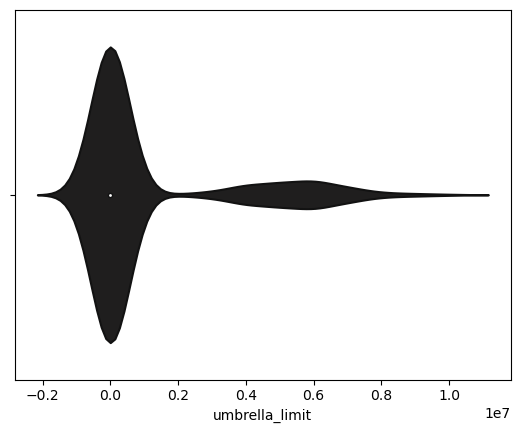

In [8]:
sns.violinplot(inds['umbrella_limit'] , palette='icefire' )
print(inds['umbrella_limit'].value_counts())

In the above plot we can see that umbrella_limit has the highest value at 0.0 point.

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64


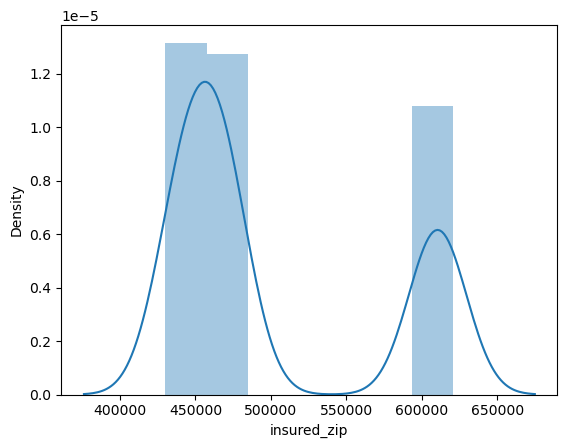

In [9]:
sns.distplot(inds['insured_zip']  )
print(inds['insured_zip'].value_counts())

In this plot we can see that insured_zip has the highest value at 450000 point.

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


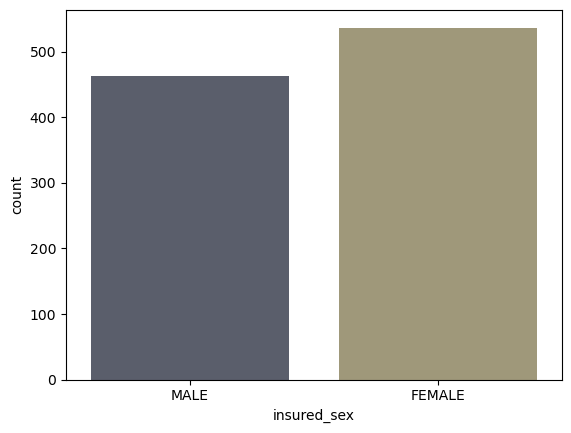

In [10]:
sns.countplot(inds['insured_sex'],palette='cividis'  )
print(inds['insured_sex'].value_counts())

In the insured_sex plot we can see that Female are more as compared to Male.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


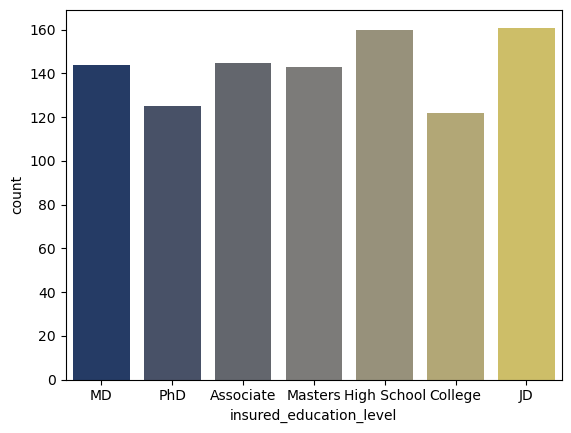

In [11]:
sns.countplot(inds['insured_education_level'],palette='cividis'  )
print(inds['insured_education_level'].value_counts())

In this plot we can see that education_level is high at high school and JD.

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


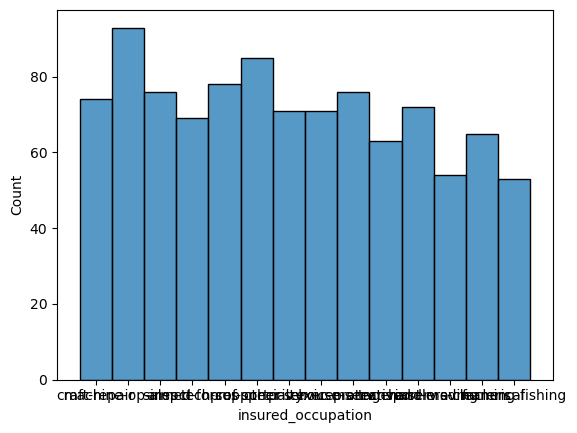

In [13]:
sns.histplot(inds['insured_occupation'],palette='cividis'  )
print(inds['insured_occupation'].value_counts())

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


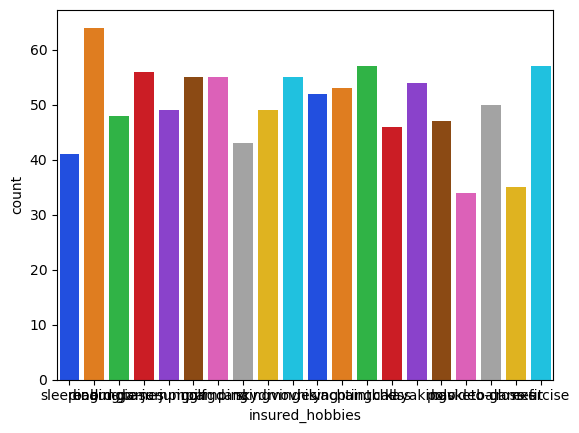

In [15]:
sns.countplot(inds['insured_hobbies'],palette='bright'  )
print(inds['insured_hobbies'].value_counts())

In this plot we see all the values is equally distributed for all columns.

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


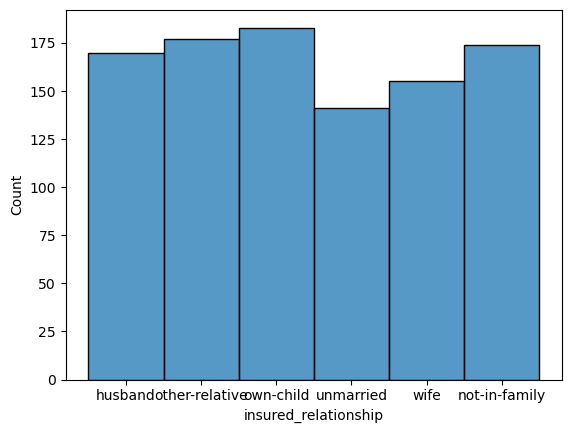

In [16]:
sns.histplot(inds['insured_relationship'],palette='bright'  )
print(inds['insured_relationship'].value_counts())

In the insure relationship plot we see that own child is high values.

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64


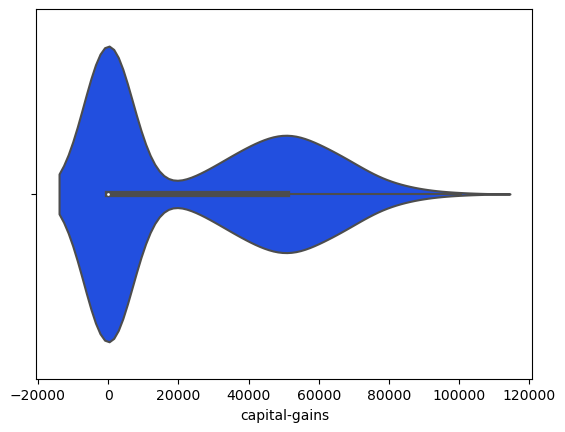

In [17]:
sns.violinplot(inds['capital-gains'],palette='bright'  )
print(inds['capital-gains'].value_counts())

In the capital_gain plot we can see that high value is at 0 .

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64


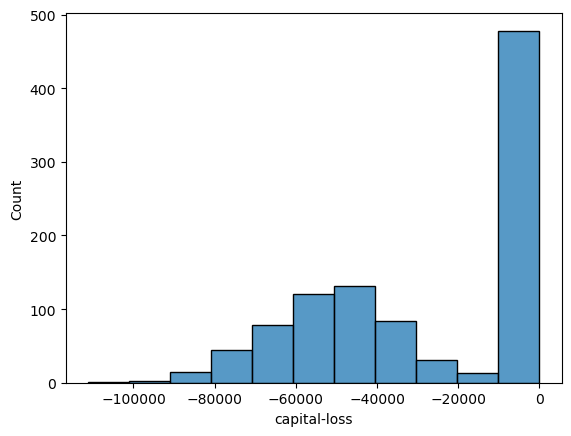

In [19]:
sns.histplot(inds['capital-loss'],palette='bright'  )
print(inds['capital-loss'].value_counts())

In the capital_loss plot we see that highest value at 0 point.

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

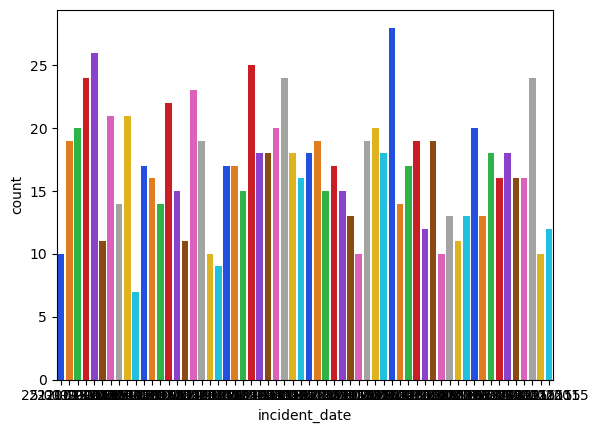

In [20]:
sns.countplot(inds['incident_date'],palette='bright'  )
print(inds['incident_date'].value_counts())

In the incident_date plot all the values is equally distributed.

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


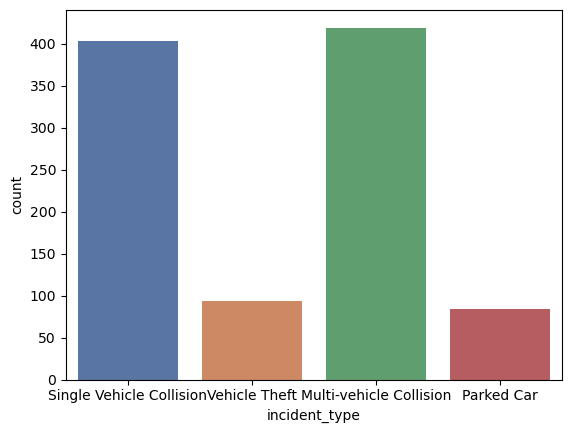

In [21]:
sns.countplot(inds['incident_type'],palette='deep'  )
print(inds['incident_type'].value_counts())

In the Incident_type we can see that multi_vehicle collision has the highest value .

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


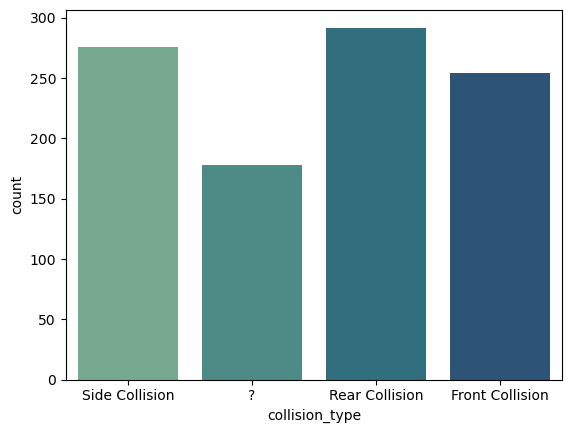

In [23]:
sns.countplot(inds['collision_type'],palette='crest'  )
print(inds['collision_type'].value_counts())

In this plot we can see that colision type has the highest value at rear collision.

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


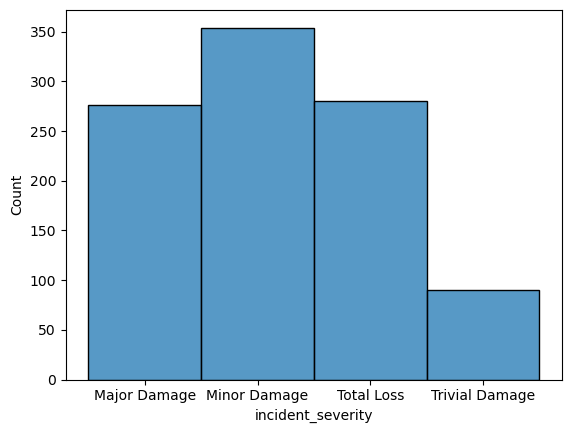

In [24]:
sns.histplot(inds['incident_severity'],palette='crest'  )
print(inds['incident_severity'].value_counts())

In the Incident severity plot we can see that minor damage has the highest value.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


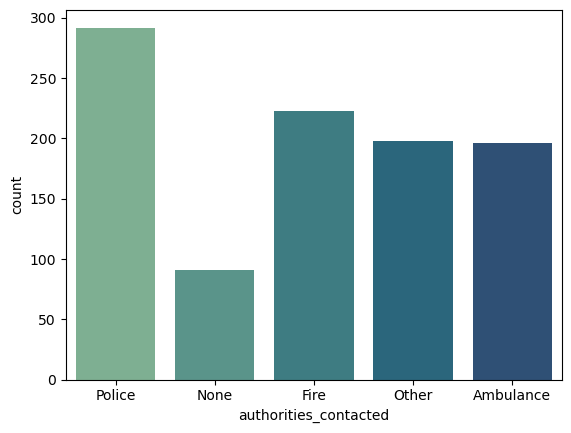

In [26]:
sns.countplot(inds['authorities_contacted'],palette='crest'  )
print(inds['authorities_contacted'].value_counts())

The authorities_contacted plot we cansee that police has highest value.

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


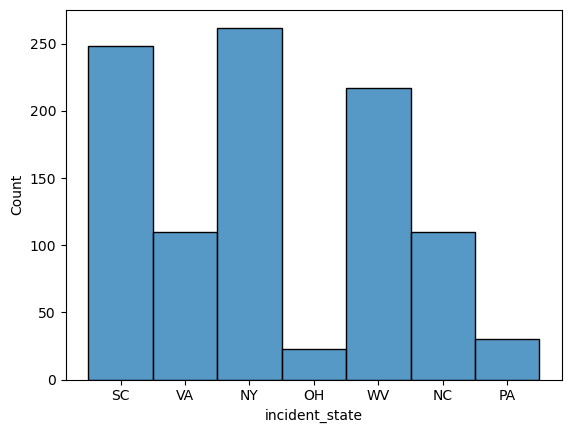

In [28]:
sns.histplot(inds['incident_state'],palette='crest'  )
print(inds['incident_state'].value_counts())

In the incident_state plot we see that NY has the highest value .

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


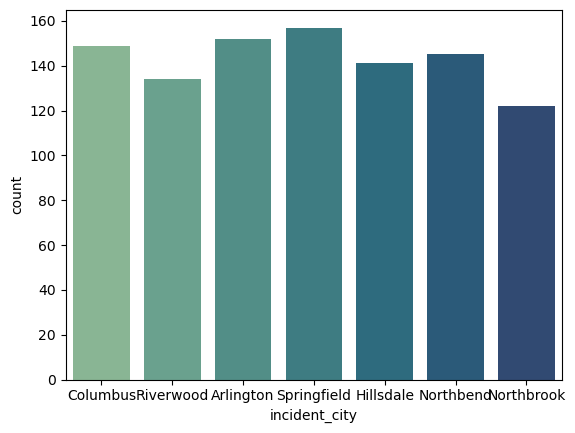

In [29]:
sns.countplot(inds['incident_city'],palette='crest'  )
print(inds['incident_city'].value_counts())

As per above plot we can see that incident_city has almost equal data for all .

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64


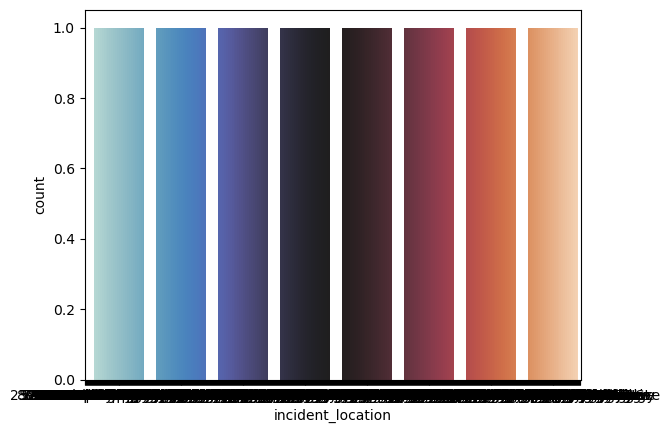

In [30]:
sns.countplot(inds['incident_location'],palette='icefire'  )
print(inds['incident_location'].value_counts())

In the incident location plot all the value has equally distributed for all.

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


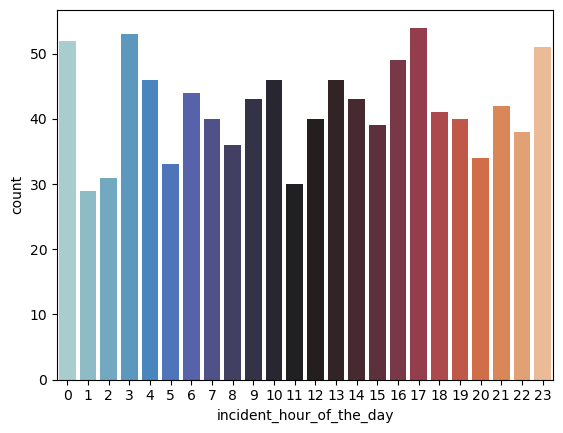

In [31]:
sns.countplot(inds['incident_hour_of_the_day'],palette='icefire'  )
print(inds['incident_hour_of_the_day'].value_counts())

In the Incident_hour_of_the_day plot we have highest value at point 3 and 17 and many others.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


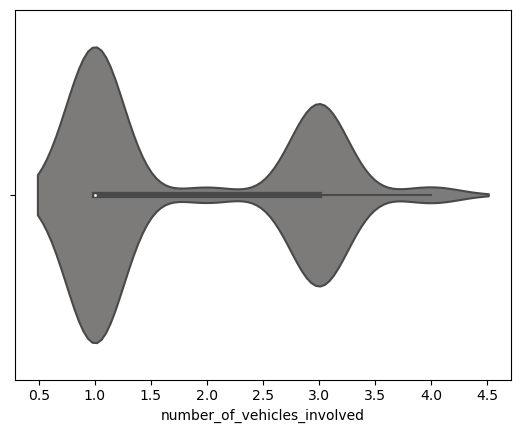

In [33]:
sns.violinplot(inds['number_of_vehicles_involved'],palette='cividis'  )
print(inds['number_of_vehicles_involved'].value_counts())

In the number_of_vehicles_involved plot we have highest value at 1.0 and then second highest value at 3.0.

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


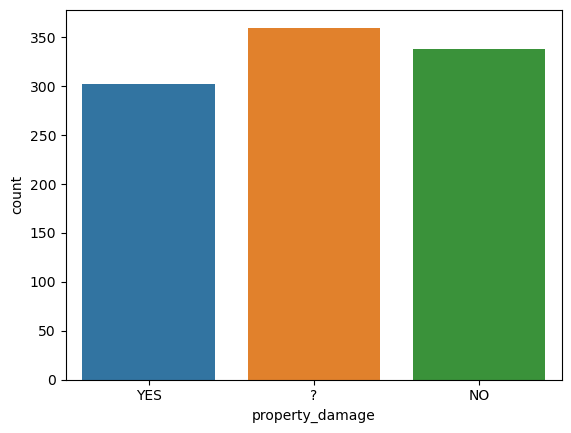

In [36]:
sns.countplot(inds['property_damage']  )
print(inds['property_damage'].value_counts())

In the property_damage plot we have highest value at unknown.

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


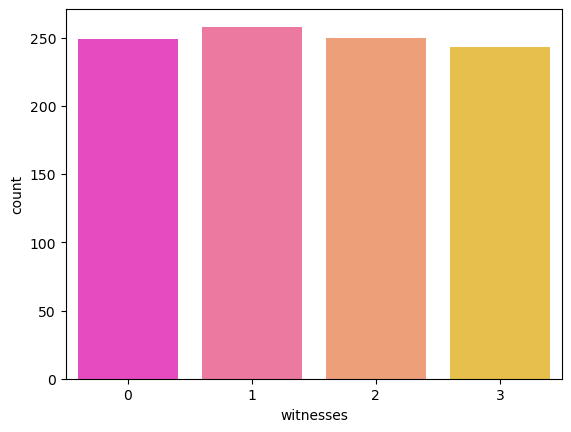

In [38]:
sns.countplot(inds['witnesses'],palette='spring'  )
print(inds['witnesses'].value_counts())

In the witness plot we see that values are equally distributed for all.

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


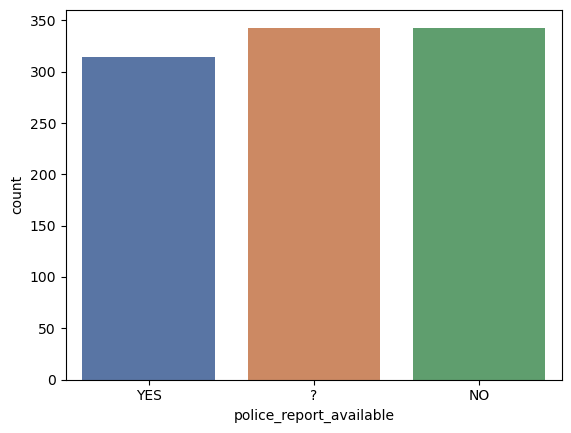

In [39]:
sns.countplot(inds['police_report_available'],palette='deep'  )
print(inds['police_report_available'].value_counts())

In the police_report_available plot NO has the highest value .

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64


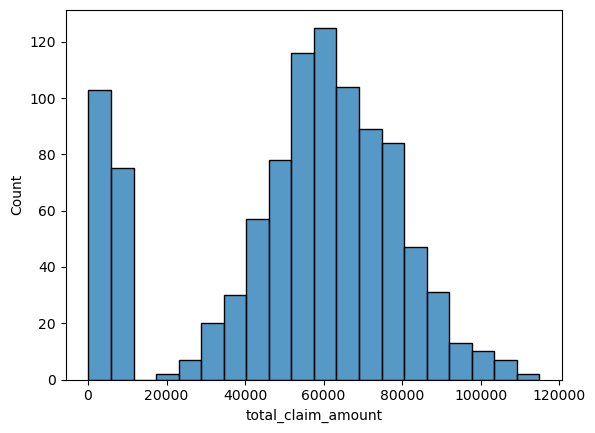

In [40]:
sns.histplot(inds['total_claim_amount'],palette='deep'  )
print(inds['total_claim_amount'].value_counts())

In the total_claim_amount plot has the highest value between 60000 and 80000.

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64


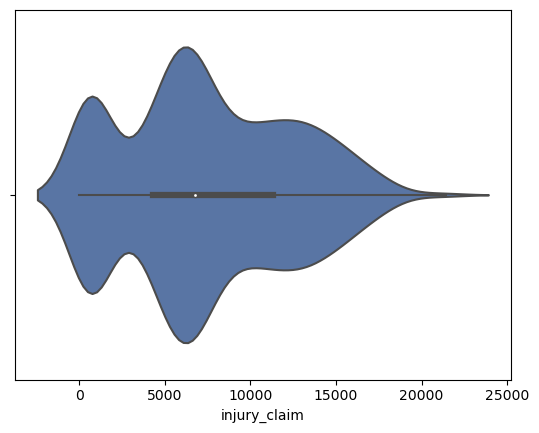

In [41]:
sns.violinplot(inds['injury_claim'],palette='deep'  )
print(inds['injury_claim'].value_counts())

In injury_claim plot we have highest value in between 5000 and 15000 points.

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64


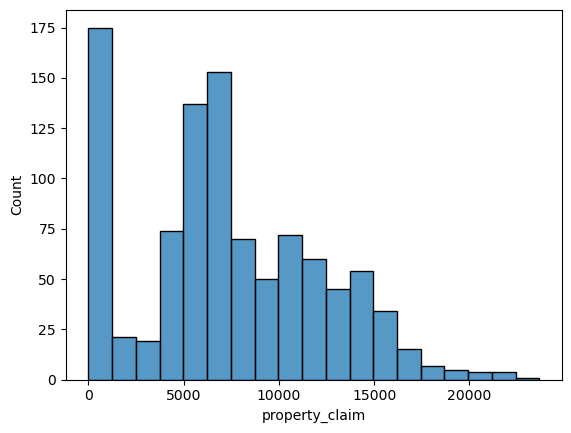

In [42]:
sns.histplot(inds['property_claim'],palette='deep'  )
print(inds['property_claim'].value_counts())

In the property_claim plot we have highest value at 0 and 5000 points.

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64


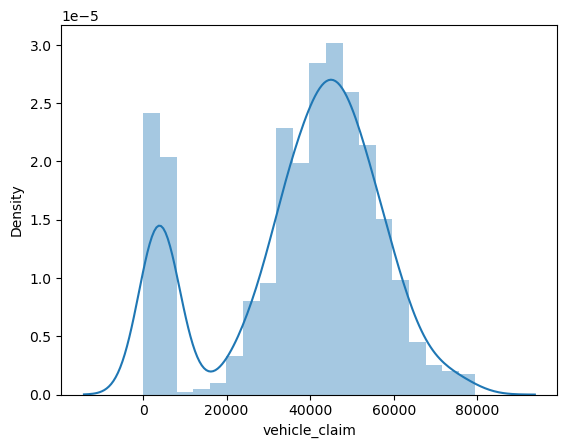

In [44]:
sns.distplot(inds['vehicle_claim']  )
print(inds['vehicle_claim'].value_counts())

In the above plot the vehicle_claim has the highest value in between 40000 and 60000 points.

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


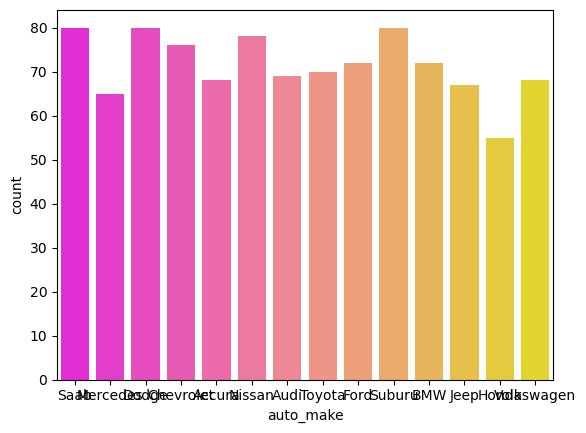

In [45]:
sns.countplot(inds['auto_make'] ,palette='spring' )
print(inds['auto_make'].value_counts())

In the auto_make plot we have all the equal value for all .

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


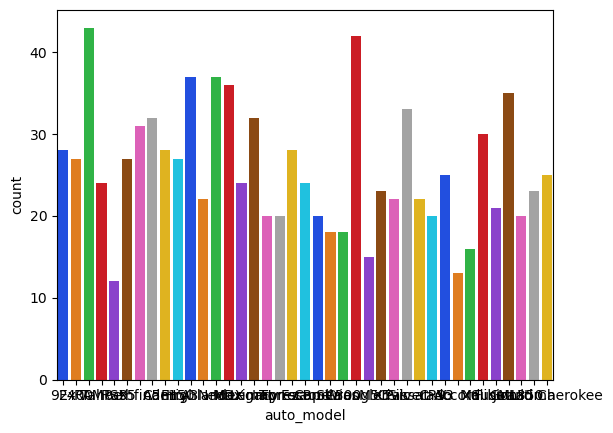

In [46]:
sns.countplot(inds['auto_model'] ,palette='bright' )
print(inds['auto_model'].value_counts())

In the auto_model plot we can see that all the point has some or other values.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


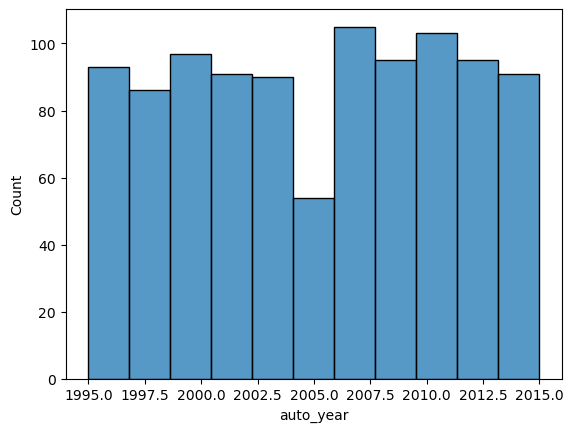

In [47]:
sns.histplot(inds['auto_year'] ,palette='bright' )
print(inds['auto_year'].value_counts())

In the Auto year plot we see that year 2007 and 2010 has the highest value.

N    753
Y    247
Name: fraud_reported, dtype: int64


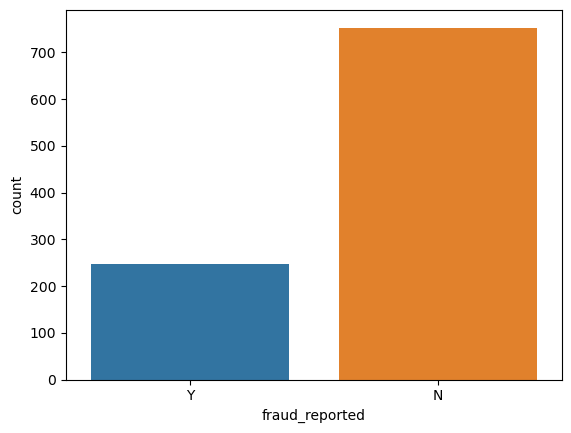

In [50]:
sns.countplot(inds['fraud_reported'] )
print(inds['fraud_reported'].value_counts())

In the Fraud_reported plot we can see that No is higher than yes.

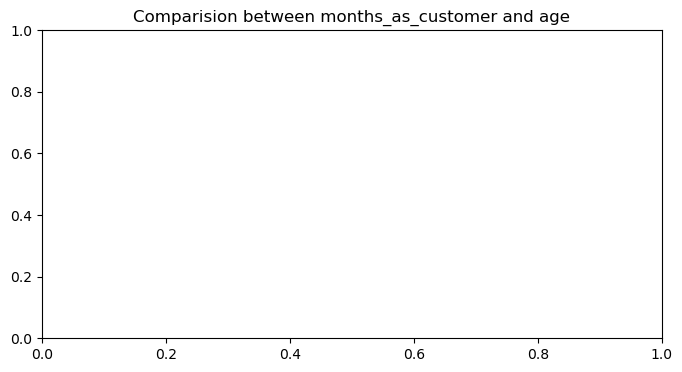

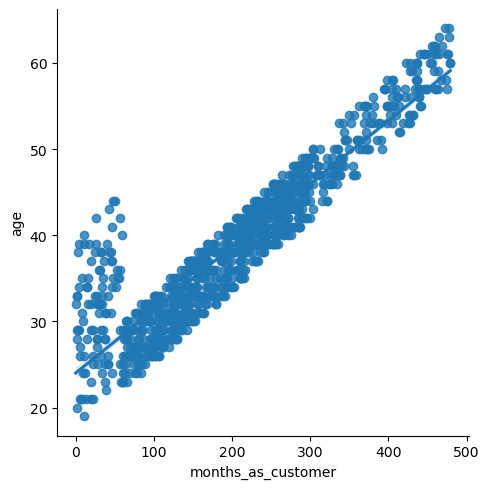

In [52]:
# Comparision between months_as_customer and age

plt.figure(figsize=(8,4))
plt.title('Comparision between months_as_customer and age')
sns.lmplot(x='months_as_customer',y='age' ,data=inds ,palette='bright')
plt.show()

In the above plot we see the linear relation between age and month_as_customer.

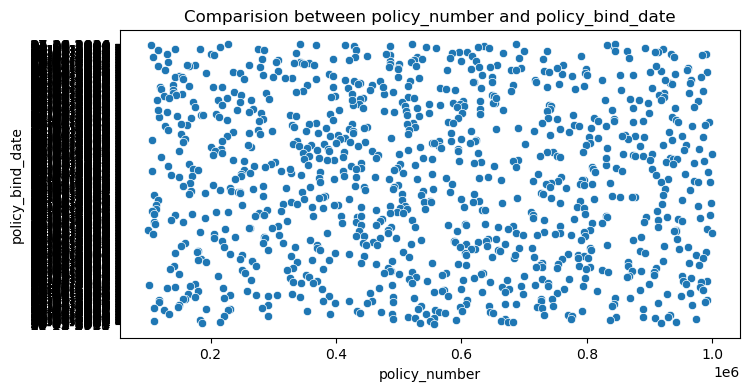

In [54]:
# Comparision between policy_number and policy_bind_date

plt.figure(figsize=(8,4))
plt.title('Comparision between policy_number and policy_bind_date')
sns.scatterplot(x='policy_number',y='policy_bind_date' ,data=inds ,palette='bright')
plt.show()

As per above plot we can see that policy number and policy bind date has equally spread values.

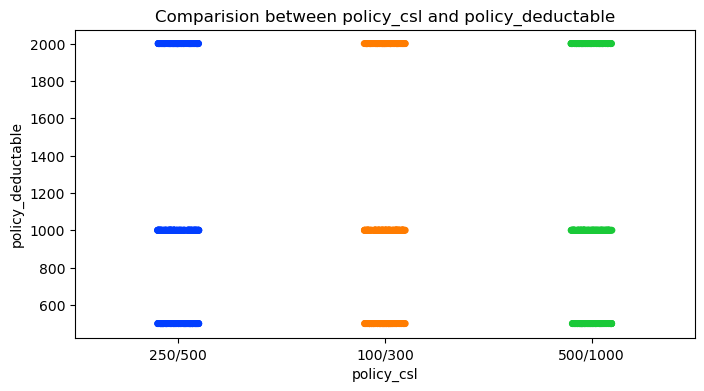

In [56]:
# Comparision between policy_csl and policy_deductable

plt.figure(figsize=(8,4))
plt.title('Comparision between policy_csl and policy_deductable')
sns.stripplot(x='policy_csl',y='policy_deductable' ,data=inds ,palette='bright')
plt.show()

For the policy deductable and Csl has the equal values for all the points.

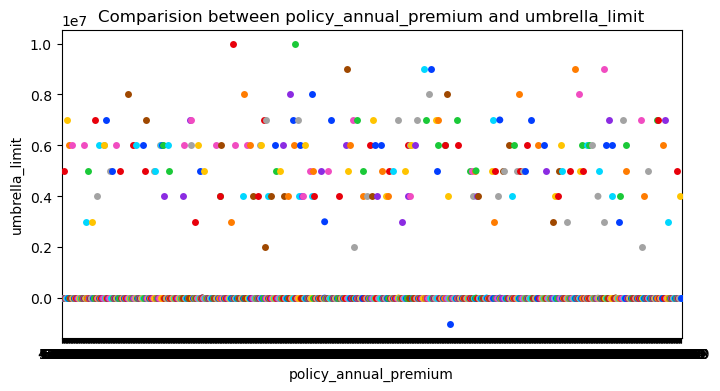

In [57]:
# Comparision between policy_annual_premium and umbrella_limit

plt.figure(figsize=(8,4))
plt.title('Comparision between policy_annual_premium and umbrella_limit')
sns.stripplot(x='policy_annual_premium',y='umbrella_limit' ,data=inds ,palette='bright')
plt.show()

In above plot we can see that point 0 has equal value for both axis and remaining has equally distributed values.

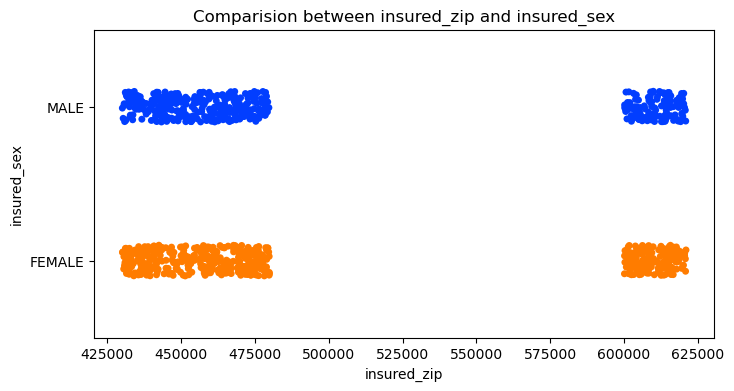

In [59]:
# Comparision between insured_zip and insured_sex

plt.figure(figsize=(8,4))
plt.title('Comparision between insured_zip and insured_sex')
sns.stripplot(x='insured_zip',y='insured_sex' ,data=inds ,palette='bright')
plt.show()

for Insured_zip and insured_sex has the highest value between 425000 to 475000 .

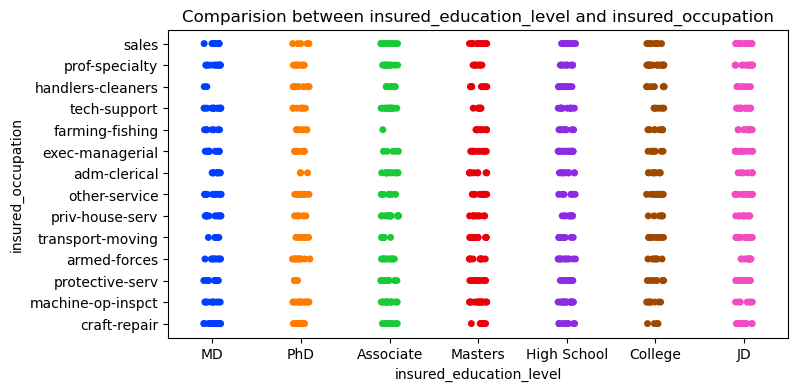

In [60]:
# Comparision between insured_education_level and insured_occupation

plt.figure(figsize=(8,4))
plt.title('Comparision between insured_education_level and insured_occupation')
sns.stripplot(x='insured_education_level',y='insured_occupation' ,data=inds ,palette='bright')
plt.show()

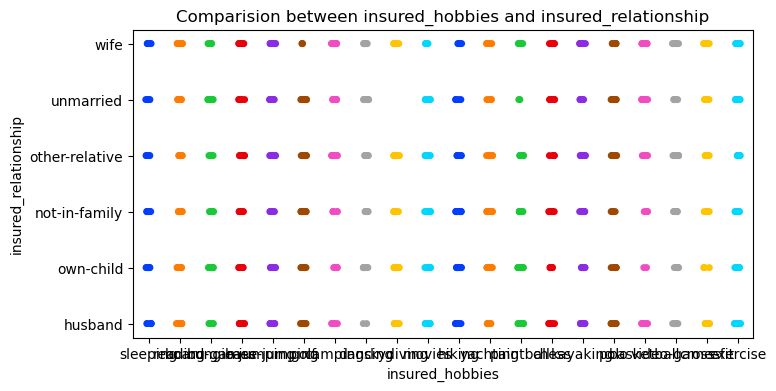

In [63]:
# Comparision between insured_hobbies and insured_relationship

plt.figure(figsize=(8,4))
plt.title('Comparision between insured_hobbies and insured_relationship')
sns.stripplot(x='insured_hobbies',y='insured_relationship' ,data=inds ,palette='bright')
plt.show()

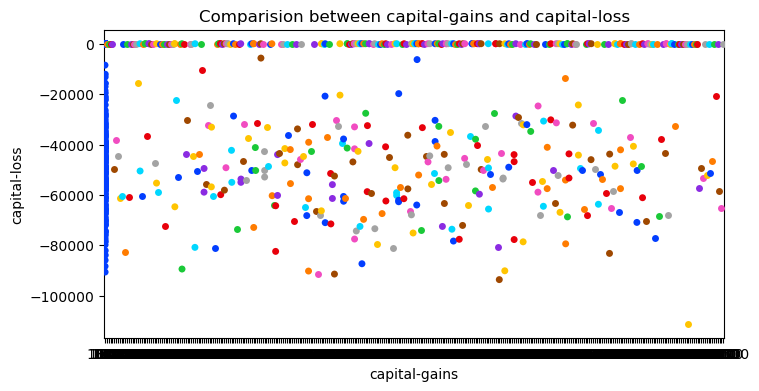

In [64]:
# Comparision between capital-gains and capital-loss

plt.figure(figsize=(8,4))
plt.title('Comparision between capital-gains and capital-loss')
sns.stripplot(x='capital-gains',y='capital-loss' ,data=inds ,palette='bright')
plt.show()

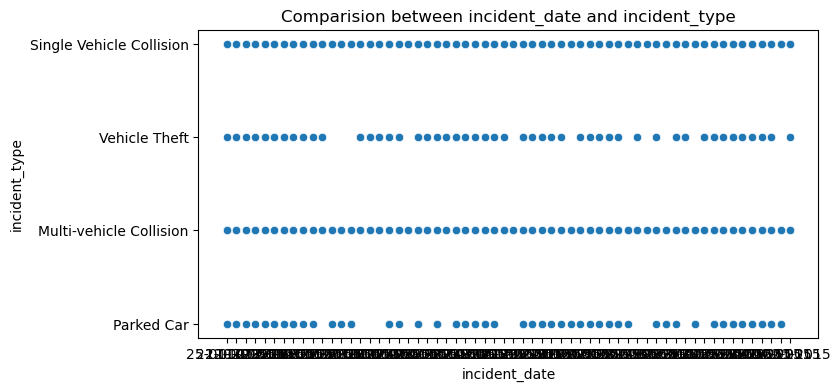

In [66]:
# Comparision between incident_date and incident_type

plt.figure(figsize=(8,4))
plt.title('Comparision between incident_date and incident_type')
sns.scatterplot(x='incident_date',y='incident_type' ,data=inds ,palette='bright')
plt.show()

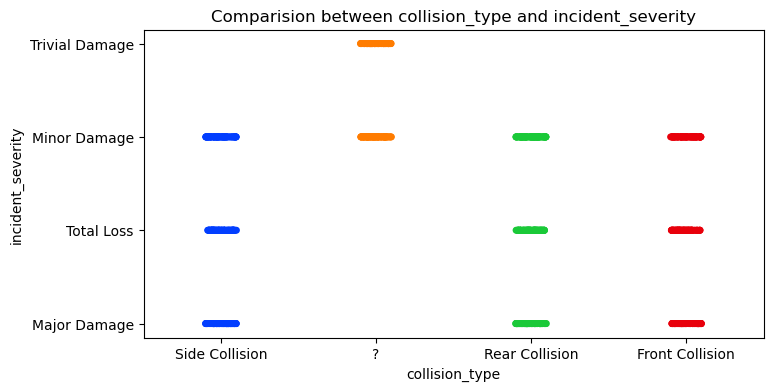

In [68]:
# Comparision between collision_type and incident_severity

plt.figure(figsize=(8,4))
plt.title('Comparision between collision_type and incident_severity')
sns.stripplot(x='collision_type',y='incident_severity' ,data=inds ,palette='bright')
plt.show()

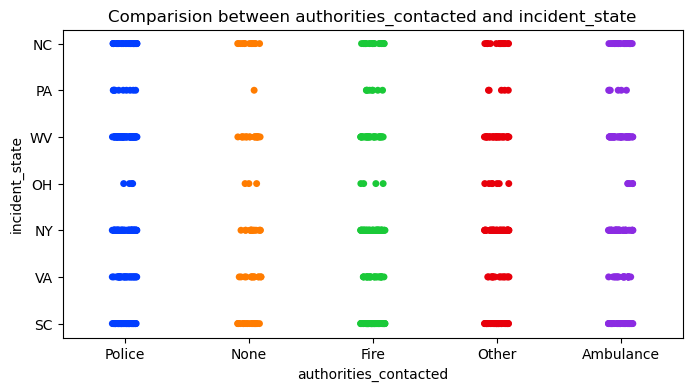

In [69]:
# Comparision between authorities_contacted and incident_state

plt.figure(figsize=(8,4))
plt.title('Comparision between authorities_contacted and incident_state')
sns.stripplot(x='authorities_contacted',y='incident_state' ,data=inds ,palette='bright')
plt.show()

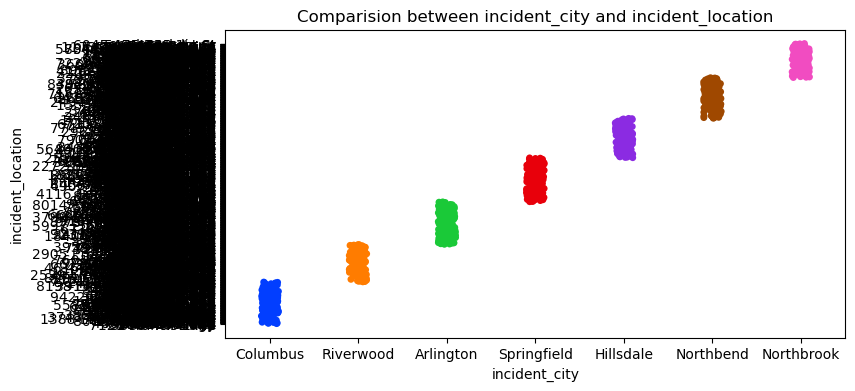

In [70]:
# Comparision between incident_city and incident_location

plt.figure(figsize=(8,4))
plt.title('Comparision between incident_city and incident_location')
sns.stripplot(x='incident_city',y='incident_location' ,data=inds ,palette='bright')
plt.show()

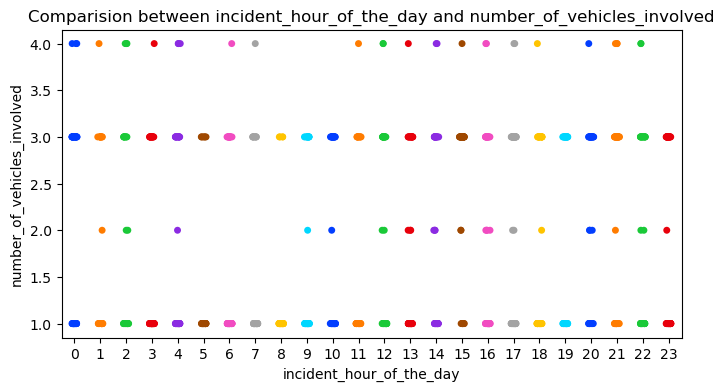

In [71]:
# Comparision between incident_hour_of_the_day and number_of_vehicles_involved

plt.figure(figsize=(8,4))
plt.title('Comparision between incident_hour_of_the_day and number_of_vehicles_involved')
sns.stripplot(x='incident_hour_of_the_day',y='number_of_vehicles_involved' ,data=inds ,palette='bright')
plt.show()

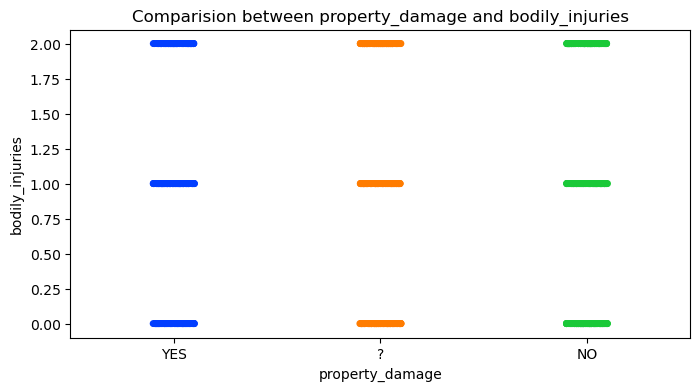

In [72]:
# Comparision between property_damage and bodily_injuries

plt.figure(figsize=(8,4))
plt.title('Comparision between property_damage and bodily_injuries')
sns.stripplot(x='property_damage',y='bodily_injuries' ,data=inds ,palette='bright')
plt.show()

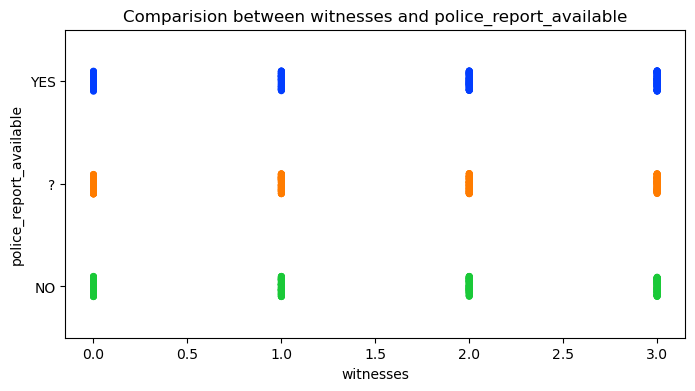

In [73]:
# Comparision between witnesses and police_report_available

plt.figure(figsize=(8,4))
plt.title('Comparision between witnesses and police_report_available')
sns.stripplot(x='witnesses',y='police_report_available' ,data=inds ,palette='bright')
plt.show()

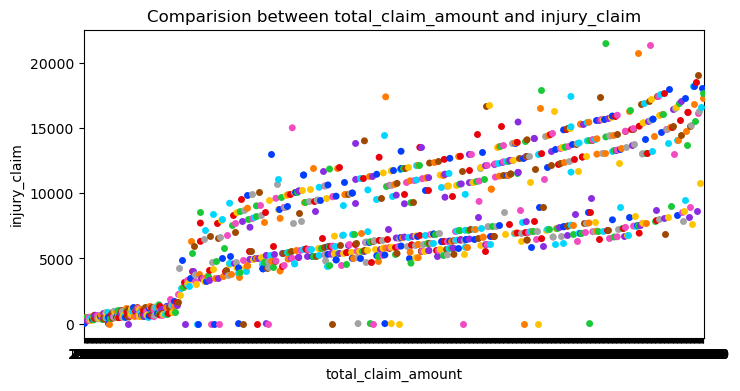

In [74]:
# Comparision between total_claim_amount and injury_claim

plt.figure(figsize=(8,4))
plt.title('Comparision between total_claim_amount and injury_claim')
sns.stripplot(x='total_claim_amount',y='injury_claim' ,data=inds ,palette='bright')
plt.show()

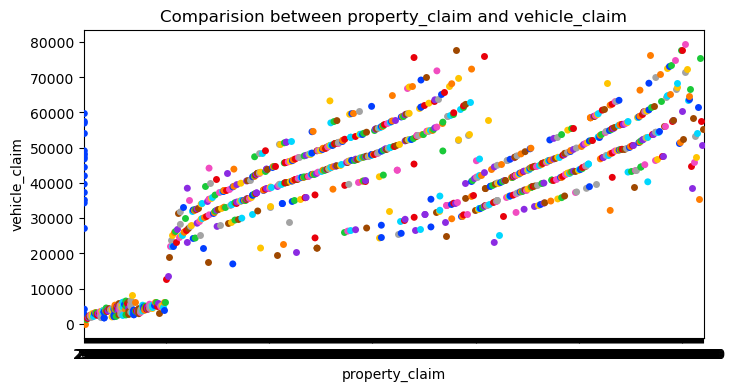

In [75]:
# Comparision between property_claim and vehicle_claim

plt.figure(figsize=(8,4))
plt.title('Comparision between property_claim and vehicle_claim')
sns.stripplot(x='property_claim',y='vehicle_claim' ,data=inds ,palette='bright')
plt.show()

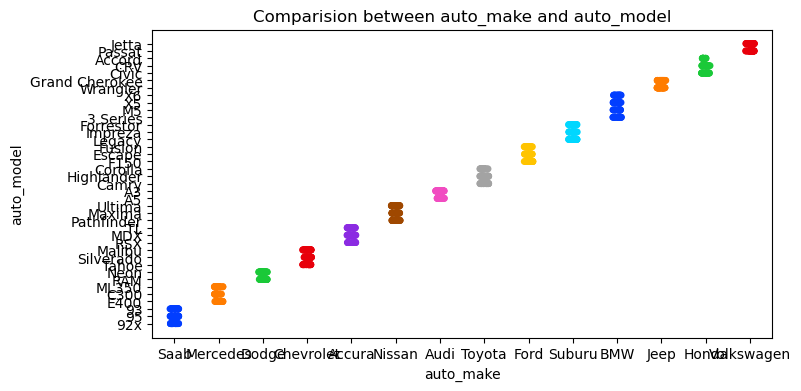

In [76]:
# Comparision between auto_make and auto_model

plt.figure(figsize=(8,4))
plt.title('Comparision between auto_make and auto_model')
sns.stripplot(x='auto_make',y='auto_model' ,data=inds ,palette='bright')
plt.show()

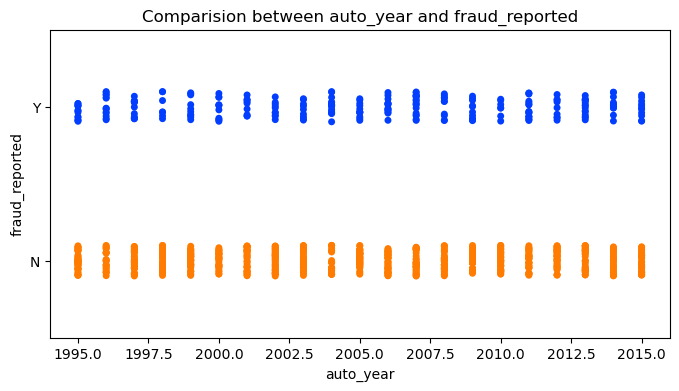

In [77]:
# Comparision between auto_year and fraud_reported

plt.figure(figsize=(8,4))
plt.title('Comparision between auto_year and fraud_reported')
sns.stripplot(x='auto_year',y='fraud_reported' ,data=inds ,palette='bright')
plt.show()

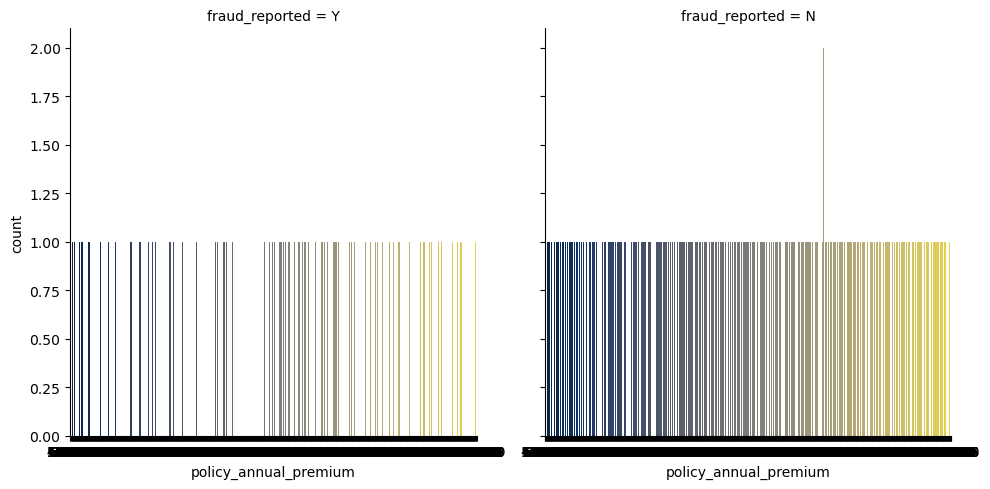

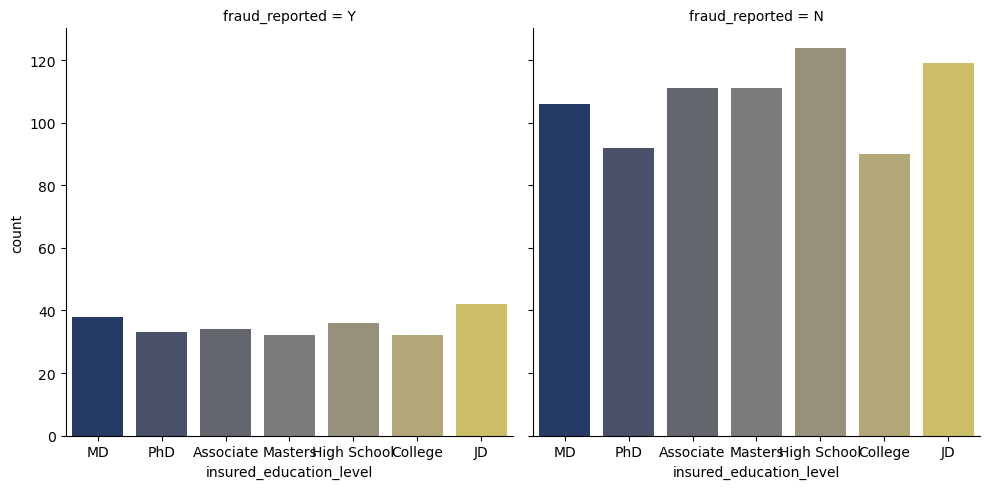

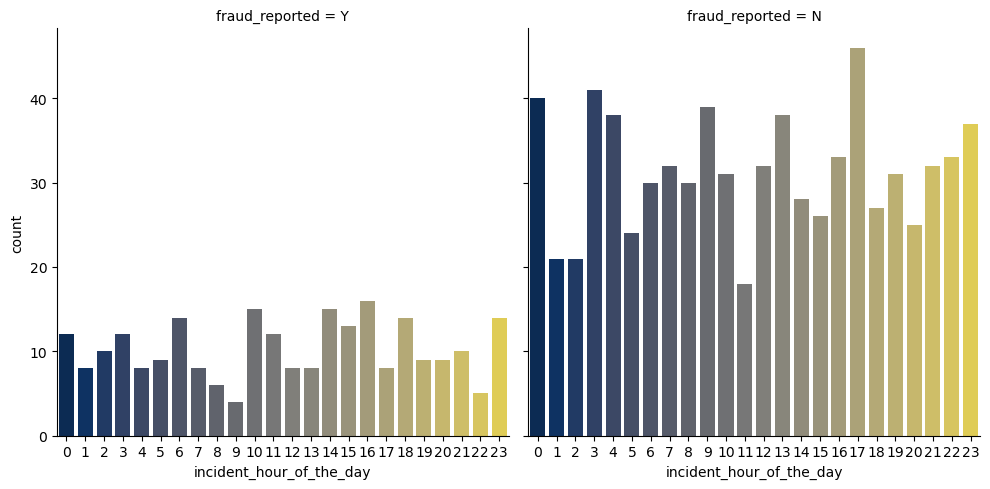

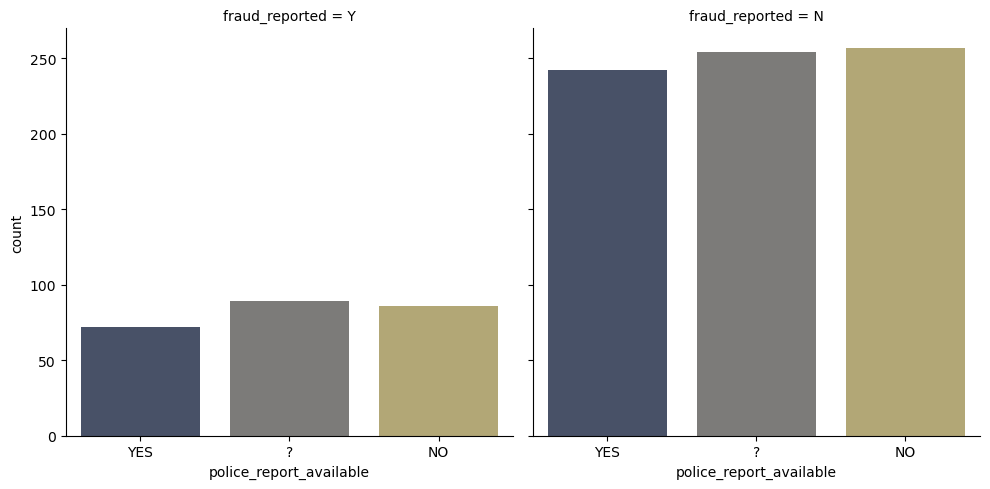

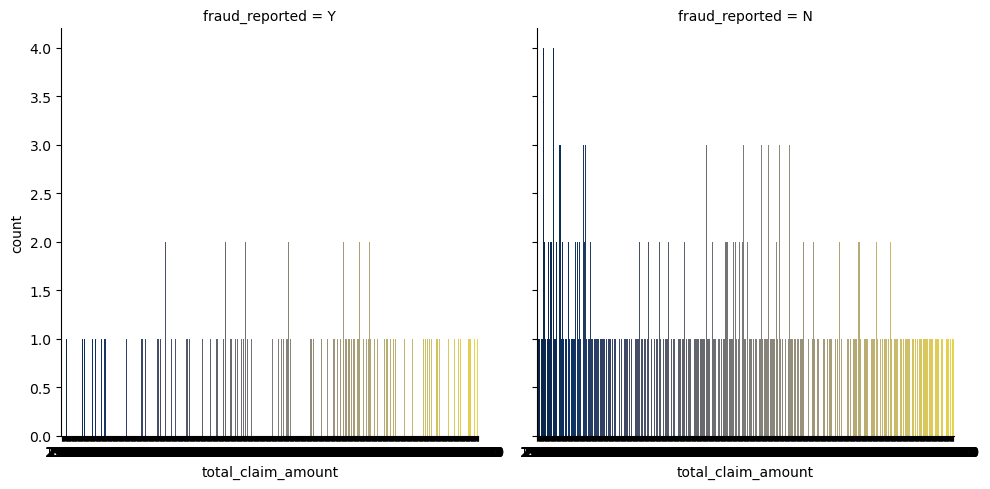

In [79]:
# Checking policy_annual_premium with fraud_reported
sns.catplot(x='policy_annual_premium' , col='fraud_reported' , data=inds , palette='cividis' , kind='count')

# Checking insured_education_level with fraud_reported
sns.catplot(x='insured_education_level' , col='fraud_reported' , data=inds , palette='cividis' , kind='count')

# Checking incident_hour_of_the_day with fraud_reported
sns.catplot(x='incident_hour_of_the_day' , col='fraud_reported' , data=inds , palette='cividis' , kind='count')

# Checking police_report_available with fraud_reported
sns.catplot(x='police_report_available' , col='fraud_reported' , data=inds , palette='cividis' , kind='count')

# Checking total_claim_amount with fraud_reported
sns.catplot(x='total_claim_amount' , col='fraud_reported' , data=inds , palette='cividis' , kind='count')



In the 1st plot we can see that policy_annual_premium is higher for fraud_reported=N.

As per 2nd plot education_level is more for fraud=N

As per 3rd plot fraud_reported=N is higher for incident_hour_of_the_day.

As per 4th plot fraud_reported=N is higher for policy_report_available.

In the 5th plot we can see that total_claim_amount is higher for fraud_reported=N.

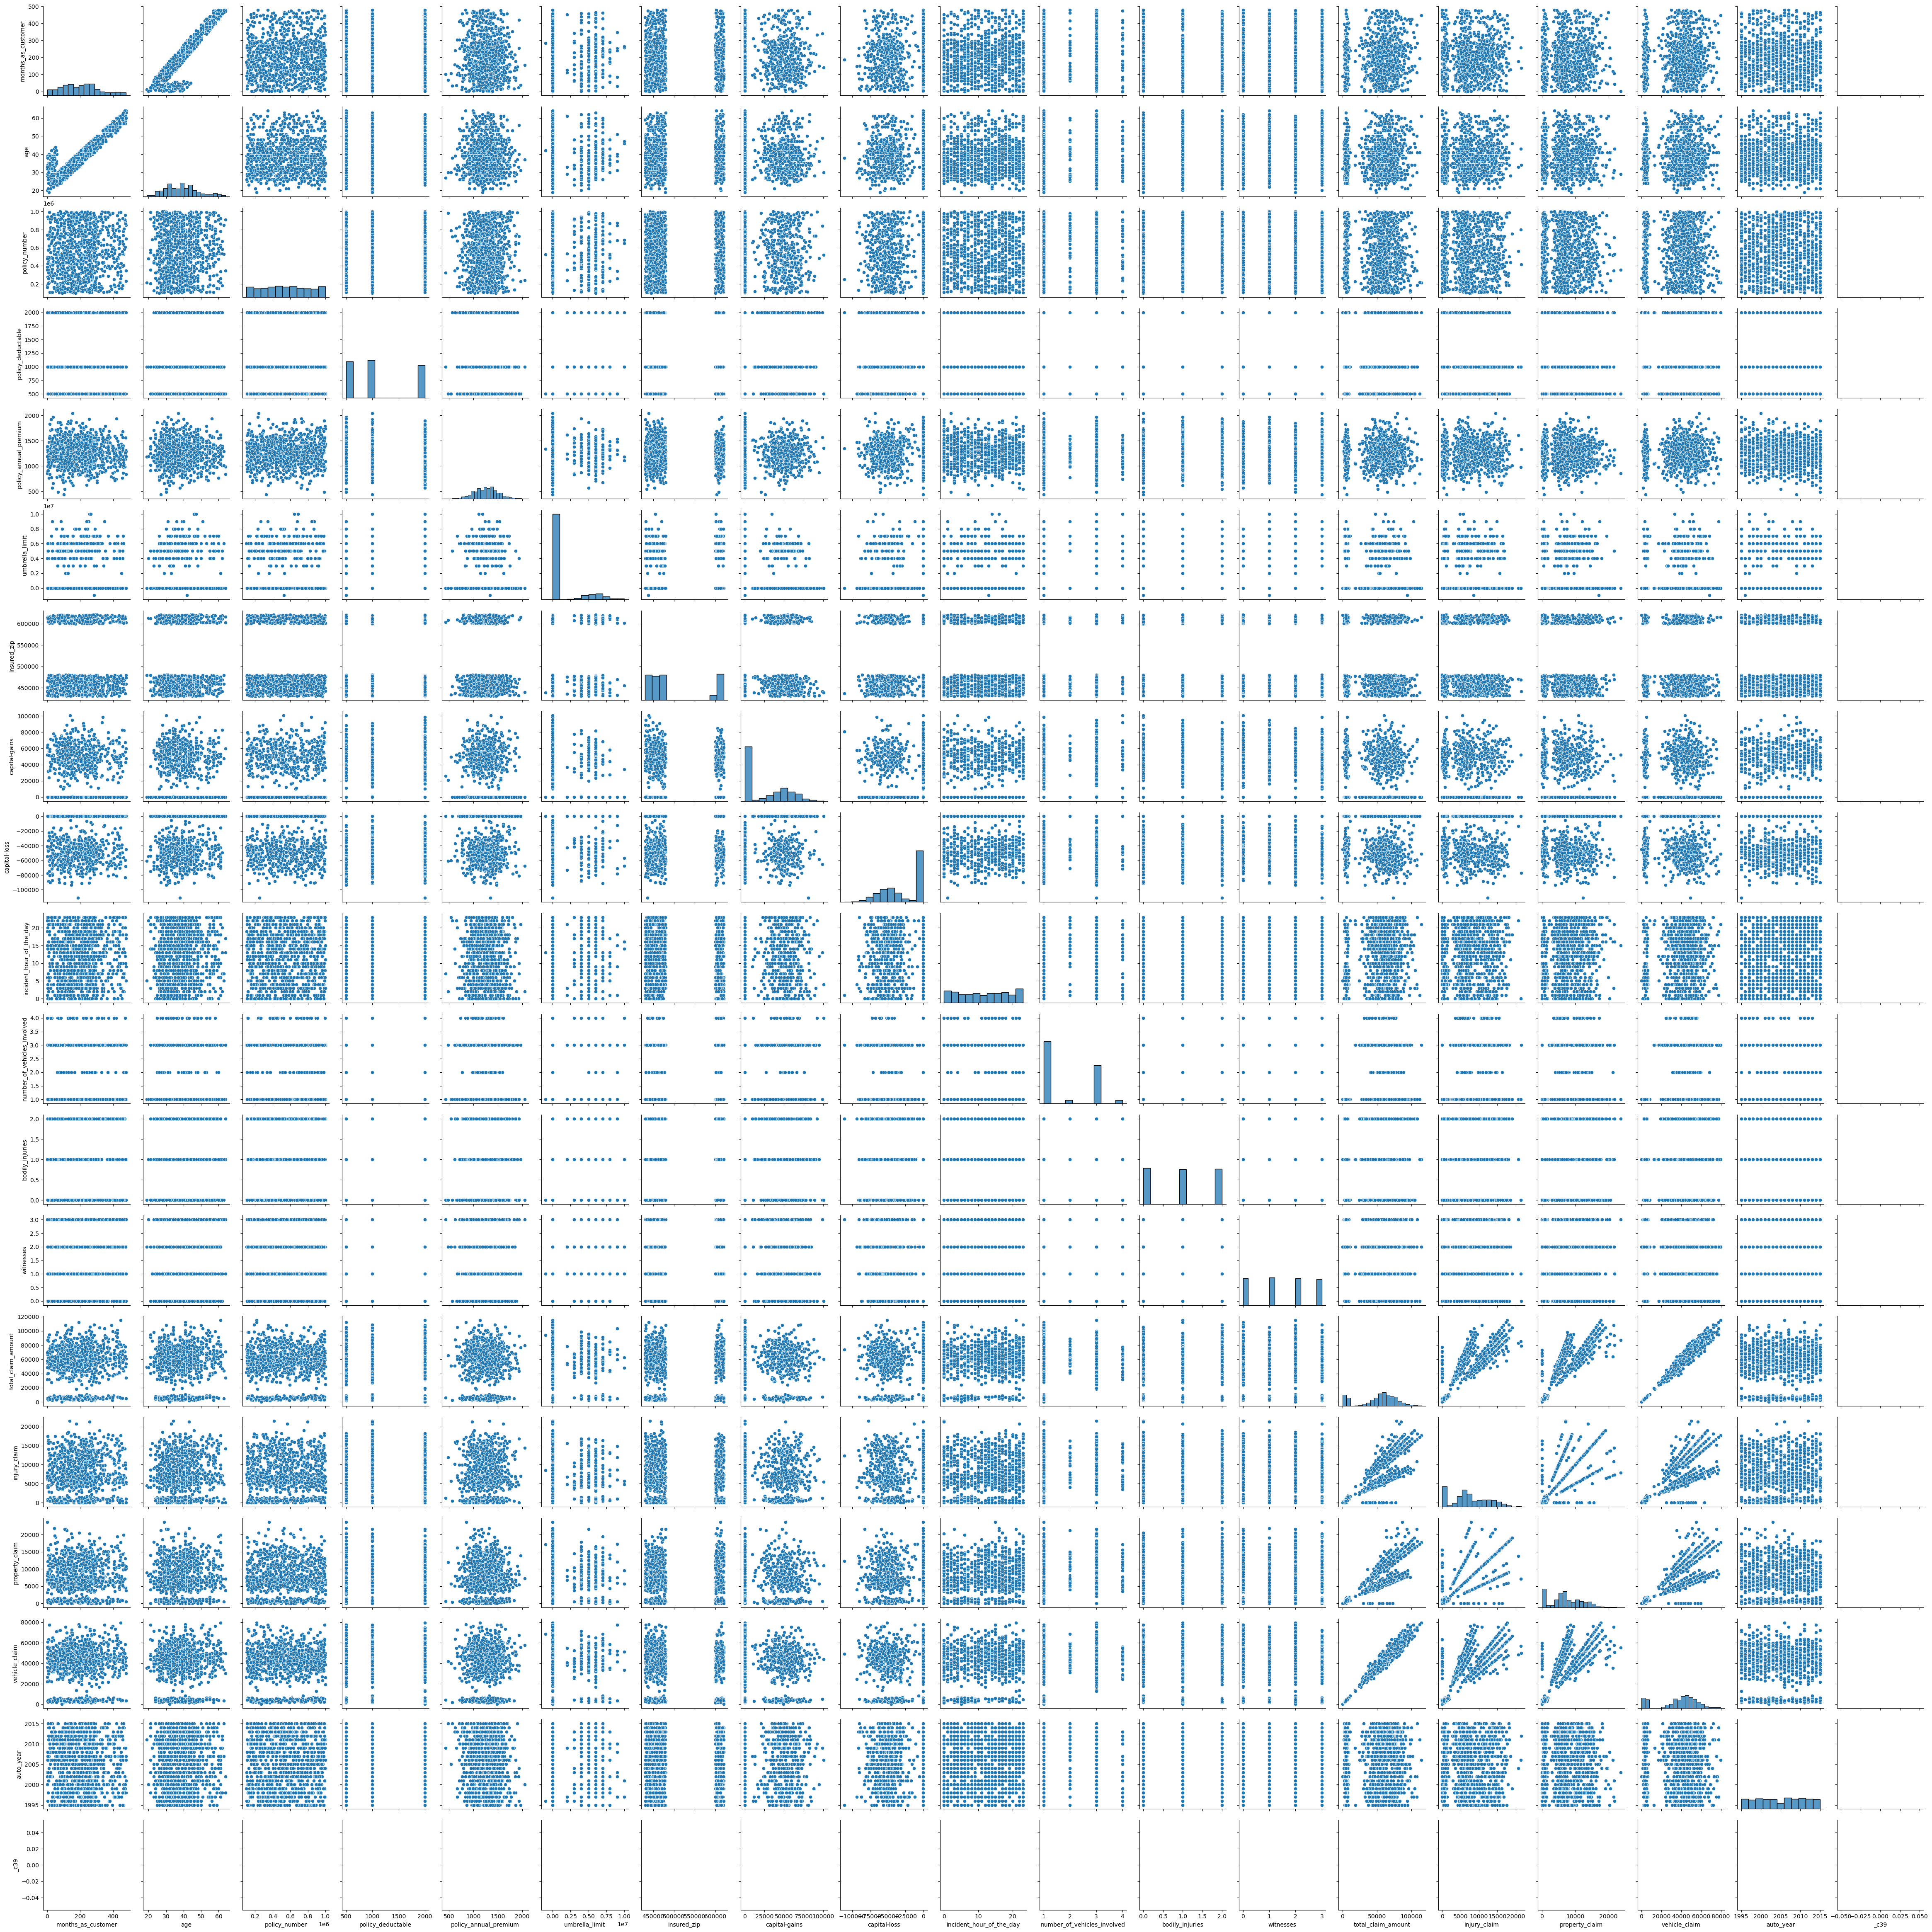

In [80]:
sns.pairplot(data= inds , palette='cividis')

It is pariwise presentation of pairplot.

In this we can see the relationship of full dataset.

As per above plot we can see that there are some column which has linear relation between the columns

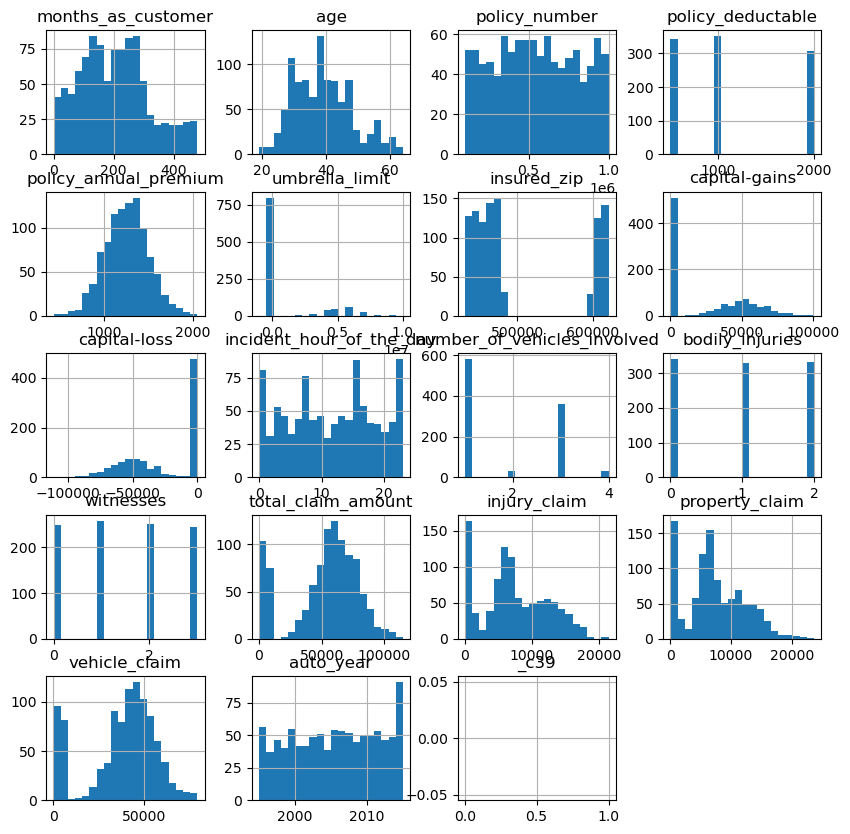

In [81]:
inds.hist(bins=20, figsize=(10,10))
plt.show()

# Ckecking skewness

In [17]:
inds.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


as per above we can see that there is not much skewness present in the dataset so we dont need to remove it.

# Checking Outlier

<Figure size 800x200 with 0 Axes>

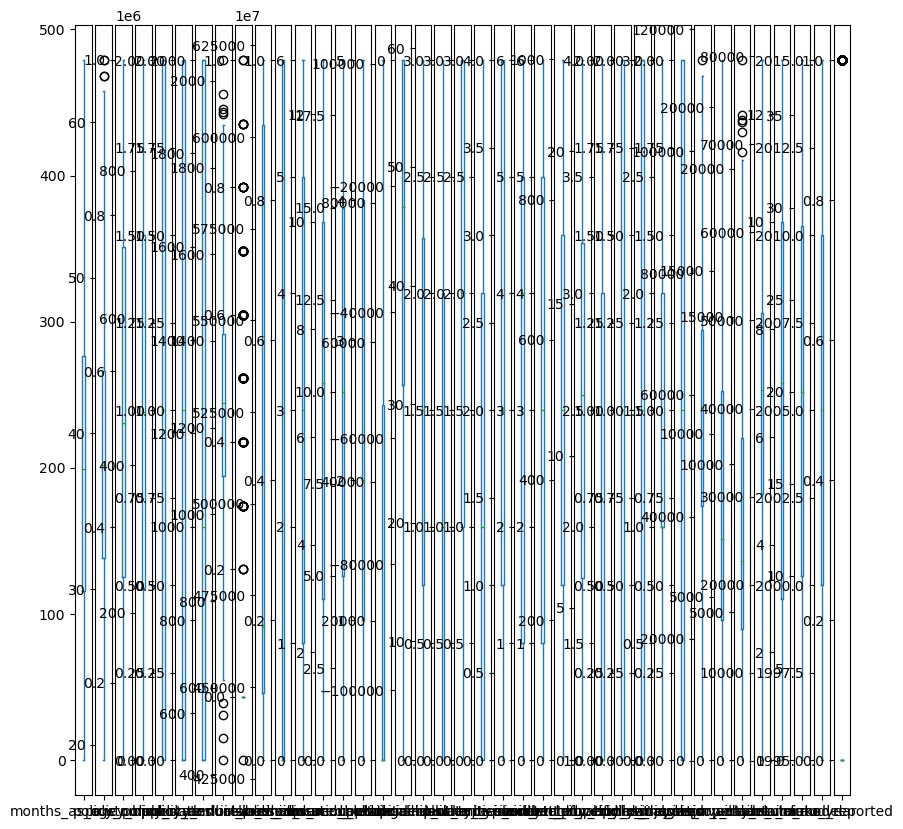

In [18]:
plt.figure(figsize=(8,2))
inds.plot(kind='box' ,subplots=True  ,figsize=(10,10))
plt.show()

as per above plot we can see that there is some outlier present in the dataset.

In [19]:
# Removing Outliers

from scipy.stats import zscore

In [20]:
z = np.abs(zscore(inds))
z

months_as_customer       age  policy_number  policy_bind_date  \
0              1.078140  0.990836       0.095953          0.209500   
1              0.208995  0.334073       0.791527          1.259397   
2              0.608002  1.088913       0.550566          1.047470   
3              0.452355  0.224613       1.239334          1.059589   
4              0.208995  0.552994       0.695834          1.065634   
..                  ...       ...            ...               ...   
995            1.746582  0.103769       1.539740          0.046021   
996            0.704407  0.224613       1.398429          1.254543   
997            0.642767  0.541611       1.448920          0.125944   
998            2.208028  2.523284       0.047867          0.358447   
999            2.190645  2.304363       0.038303          0.418985   

     policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0        1.187173    0.060937           0.222383               0.616705   
1        0.016856    0.060937           1.412784               0.242521   
2        1.187173    1.182668           1.412784               0.642233   
3        1.220886    0.060937           1.412784               0.652886   
4        1.220886    1.304542           0.222383               1.341980   
..            ...         ...                ...                    ...   
995      1.187173    1.304542           0.222383               0.222884   
996      1.220886    1.182668           0.222383               0.739141   
997      1.187173    0.060937           1.039966               0.520739   
998      1.220886    1.304542           1.412784               0.411866   
999      1.187173    0.060937           0.222383               2.008710   

     umbrella_limit  insured_zip  ...  witnesses  police_report_available  \
0          0.479476     0.489529  ...   0.461838                 1.270313   
1          1.697980     0.461008  ...   1.338700                 1.198712   
2          1.697980     0.984885  ...   1.362107                 0.035801   
3          2.133471     1.491682  ...   0.461838                 0.035801   
4          2.133471     1.527808  ...   0.438431                 0.035801   
..              ...          ...  ...        ...                      ...   
995        0.479476     0.975717  ...   0.438431                 1.198712   
996        0.479476     1.492519  ...   1.362107                 1.198712   
997        0.826998     0.815138  ...   1.362107                 1.270313   
998        1.697980     0.830250  ...   0.438431                 1.270313   
999        0.479476     1.549492  ...   1.362107                 1.198712   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0              0.714257      0.189283        1.165505       0.749653   
1              1.807312      1.363822        1.372696       1.823346   
2              0.686362      0.054644        0.736072       0.785565   
3              0.403135      0.224130        0.219722       0.677607   
4              1.753121      1.257232        1.399654       1.768252   
..                  ...           ...             ...            ...   
995            1.305049      2.051155        0.273817       1.224309   
996            2.111466      2.182342        2.214794       1.821868   
997            0.558507      0.013648        0.020826       0.771902   
998            0.219110      0.453708        0.451976       0.073580   
999            1.807691      1.429416        1.343664       1.814340   

     auto_make  auto_model  auto_year  fraud_reported  
0     0.856466    1.645743   0.183440        1.746019  
1     0.360539    0.657470   0.315491        1.746019  
2     0.631315    0.959702   0.315491        0.572731  
3     0.879279    1.319074   1.479664        1.746019  
4     1.623169    1.049545   0.648112        0.572731  
..         ...         ...        ...             ...  
995   0.135388    1.196528   0.149180        0.572731  
996   1.600357    0.78001

In [21]:
threasold = 3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [22]:
inds_new = inds[(z<3).all(axis=1)]
inds_new

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851               487             2   
996                 285   41         186934               129             0   
997                 130   34         918516               509             2   
998                 458   62         533940               573             0   
999                 456   60         556080               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
4             2               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        2               71610   
1         468176  ...          0                        0                5070   
2         430632  ...          3                        1               34650   
3         608117  ...          2                        1               63400   
4         610706  ...          1                        1                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        0               87200   
996       608177  ...          3                        0              108480   
997       442797  ...          3                        2               67500   
998       441714  ...          1                        2               46980   
999       612260  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080         10           1   
1             780             780           3510          8          12   
2            7700            3850          23100          4          30   
3            6340            6340          50720          3          34   
4            1300             650           4550          0          31   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040          6           6   
996         18080           18080          72320         13          28   
997          7500            7500          52500         11          19   
998          5220            5220          36540          1           5   
999           460             920           3680          8          12   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006            

In [23]:
inds_new.shape

(980, 39)

In [24]:
inds.shape

(1000, 39)

Now we see that outliers are removed.

In [25]:
inds = inds_new

# Checking Correlation

In [26]:
inds.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922960       0.061267   
age                                    0.922960  1.000000       0.062332   
policy_number                          0.061267  0.062332       1.000000   
policy_bind_date                       0.055337  0.057015       0.054617   
policy_state                          -0.007183 -0.020012       0.071343   
policy_csl                            -0.021855 -0.013323       0.042129   
policy_deductable                      0.031041  0.032036      -0.009812   
policy_annual_premium                 -0.003814  0.005330       0.028686   
umbrella_limit                         0.018213  0.013256      -0.000145   
insured_zip                            0.029572  0.035864       0.004531   
insured_sex                            0.059644  0.073790       0.007069   
insured_education_level               -0.000731  0.001647      -0.033767   
insured_occupation                     0.006925  0.014798      -0.014476   
insured_hobbies                       -0.089358 -0.079099       0.031887   
insured_relationship                   0.071492  0.076129       0.021378   
capital-gains                          0.007468 -0.004529       0.013628   
capital-loss                           0.023041  0.012860      -0.005587   
incident_date                         -0.004372  0.000775       0.045433   
incident_type                         -0.016746 -0.026286       0.007872   
collision_type                        -0.023069 -0.022674      -0.009819   
incident_severity                     -0.064094 -0.064396      -0.016051   
authorities_contacted                  0.013782  0.018441       0.021092   
incident_state                         0.015811  0.012644      -0.014040   
incident_city                         -0.006601 -0.006685      -0.026174   
incident_location                     -0.011966 -0.009067       0.015872   
incident_hour_of_the_day               0.066198  0.083720      -0.000897   
number_of_vehicles_involved            0.011831  0.020391       0.007744   
property_damage                        0.002374 -0.006900       0.001889   
bodily_injuries                       -0.007674 -0.012254      -0.006242   
witnesses                              0.063574  0.056360      -0.005587   
police_report_available                0.024521  0.019424       0.029478   
total_claim_amount                     0.058761  0.067812      -0.016199   
injury_claim                           0.065062  0.077149      -0.006386   
property_claim                         0.036660  0.062375      -0.011147   
vehicle_claim                          0.055941  0.058918      -0.018152   
auto_make                              0.049734  0.033757       0.016494   
auto_model                             0.005130  0.015322       0.064599   
auto_year                              0.000869  0.005594      -0.005574   
fraud_reported                         0.021285  0.013279      -0.036887   

                             policy_bind_date  policy_state  policy_csl  \
months_as_customer                   0.055337     -0.007183   -0.021855   
age                                  0.057015     -0.020012   -0.013323   
policy_number                        0.054617      0.071343    0.042129   
policy_bind_date                     1.000000      0.015488    0.003408   
policy_state                         0.015488      1.000000    0.001653   
policy_csl                           0.003408      0.001653    1.000000   
policy_deductable                    0.001466      0.017612    0.009912   
policy_annual_premium               -0.041670      0.015089    0.032654   
umbrella_limit                      -0.020458     -0.010921    0.013504   
insured_zip                         -0.044430      0.020669    0.005593   
insured_sex                          0.045752     -0.018002   -0.003405   
insured_education_level              0.044135     -0.027173    0.008337   
insured_occup

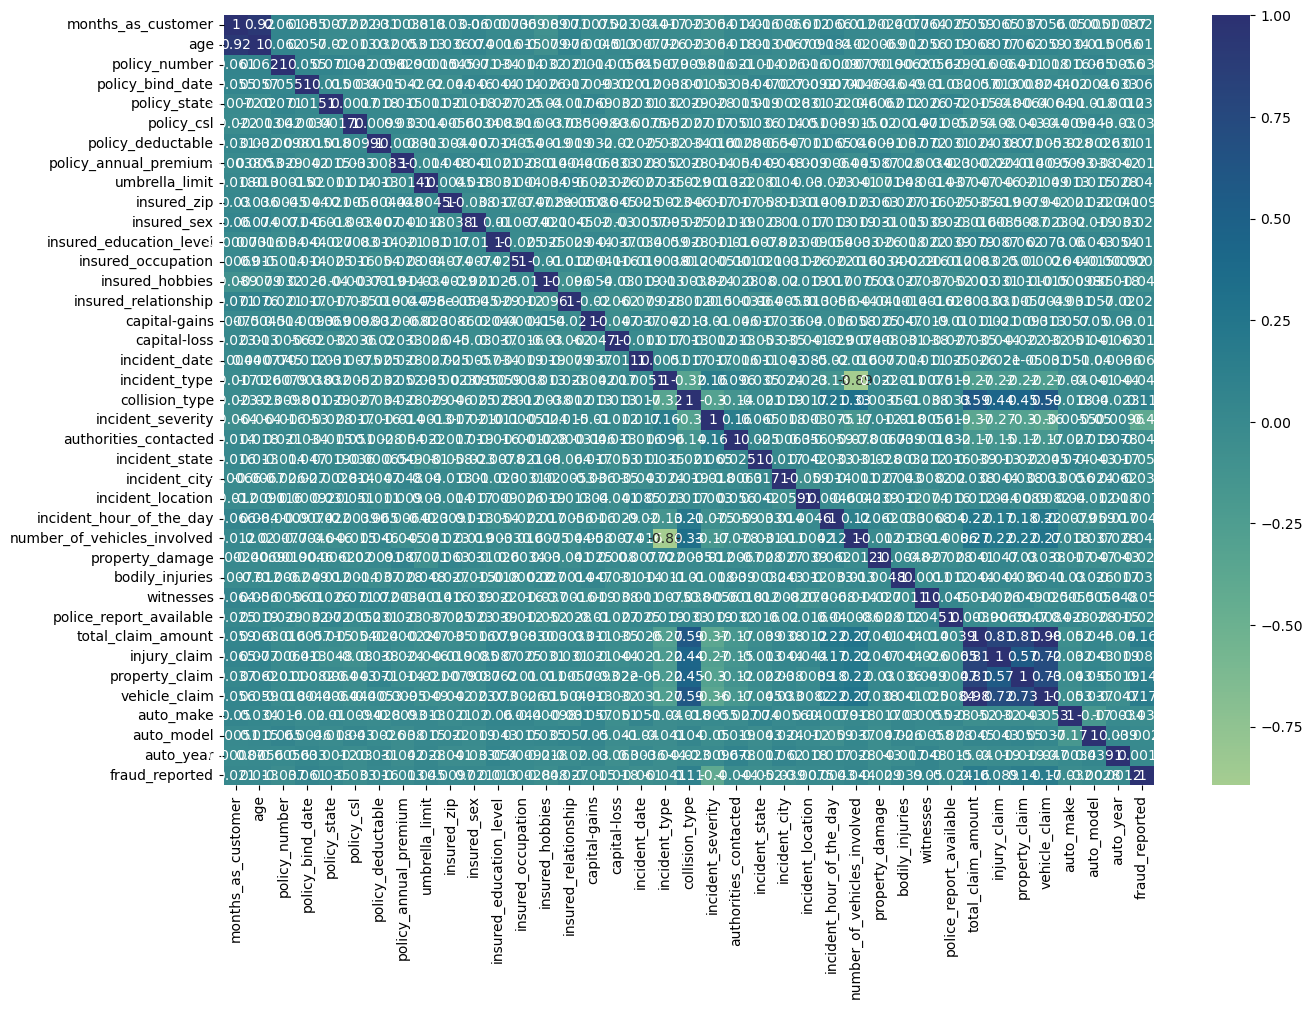

In [27]:
# checking heatmap for correlation
plt.figure(figsize=(15,10))
sns.heatmap(inds.corr() , cmap='crest' , annot=True)
plt.show()

as per above we can see that there is multicollinearity present in the dataset.

In [28]:
# Assgning x and y value

x1 = inds.drop('fraud_reported',axis=1)
y = inds['fraud_reported']

In [29]:
x1.shape

(980, 38)

In [30]:
# for removing multicollinearity we need only columns from x , where rows=0 and columns=1

x1.shape[1]

38

# Use VIF for multicollinearity

In [31]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
def vif_cal(x1):
    vif = pd.DataFrame()
    vif['Variables'] = x1.columns
    vif['VIF factor'] = [variance_inflation_factor(x1.values , i) for i in range(x1.shape[1])]
    return(vif)

vif_cal(x1)

Variables  VIF factor
0            months_as_customer   28.599636
1                           age  131.669557
2                 policy_number    5.675367
3              policy_bind_date    4.063575
4                  policy_state    2.601601
5                    policy_csl    2.454557
6             policy_deductable    4.649686
7         policy_annual_premium   29.243942
8                umbrella_limit    1.264987
9                   insured_zip   52.010127
10                  insured_sex    1.921481
11      insured_education_level    3.432915
12           insured_occupation    3.815493
13              insured_hobbies    4.124017
14         insured_relationship    3.228477
15                capital-gains    1.886737
16                 capital-loss    1.986067
17                incident_date    4.051819
18                incident_type   11.286727
19               collision_type    5.919033
20            incident_severity    3.132367
21        authorities_contacted    3.207890
22               incident_state    3.426988
23                incident_city    3.232747
24            incident_location    4.185067
25     incident_hour_of_the_day    4.214914
26  number_of_vehicles_involved   22.015569
27              property_damage    2.440423
28              bodily_injuries    2.554727
29                    witnesses    2.896709
30      police_report_available    2.526515
31           total_claim_amount         inf
32                 injury_claim         inf
33               property_claim         inf
34                vehicle_claim         inf
35                    auto_make    3.938343
36                   auto_model    4.289667
37                    auto_year  215.289367

# Use of PCA 

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components = 15)
x1 = pca.fit_transform(x1)
x1.shape

(980, 15)

now we see that multicollinearity is removed.

In [35]:
x = x1

# Performing train_test_split method

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.30 , random_state=45)

In [38]:
x_train.shape

(686, 15)

In [39]:
x_test.shape

(294, 15)

In [40]:
y_train.shape

(686,)

In [41]:
y_test.shape

(294,)

# Applying Models

In [42]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error , accuracy_score
from sklearn.model_selection import cross_val_score

In [43]:
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge , LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , BaggingRegressor , AdaBoostRegressor 
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier , AdaBoostClassifier
from sklearn.svm import SVC

In [44]:
lr = LinearRegression()
lr.fit(x_train , y_train)
pred_lr = lr.predict(x_test)
print('Linear Regression')

print('r2 score:',r2_score(y_test,pred_lr))
print('mean squared error:',mean_squared_error(y_test,pred_lr))
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_lr)))


Linear Regression
r2 score: 0.0066244900024817754
mean squared error: 0.1710675466971292
mean absolute error: 0.351630143830205
squared root error: 0.41360312703983415


In [45]:
ls = Lasso(alpha=0.01)
ls.fit(x_train , y_train)
pred_ls = ls.predict(x_test)
print('Lasso')

print('r2 score:',r2_score(y_test,pred_ls))
print('mean squared error:',mean_squared_error(y_test,pred_ls))
print('mean absolute error:',mean_absolute_error(y_test,pred_ls))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_ls)))


Lasso
r2 score: 0.006817675533401402
mean squared error: 0.17103427853770792
mean absolute error: 0.3515954918956108
squared root error: 0.4135629075941264


In [46]:
rd = Ridge(alpha=0.01)
rd.fit(x_train , y_train)
pred_rd = rd.predict(x_test)
print('Ridge')

print('r2 score:',r2_score(y_test,pred_rd))
print('mean squared error:',mean_squared_error(y_test,pred_rd))
print('mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_rd)))


Ridge
r2 score: 0.0066244906450413366
mean squared error: 0.17106754658647508
mean absolute error: 0.35163014381505486
squared root error: 0.4136031269060657


In [47]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
print('Decision Tree Regressor')

print('r2 score:',r2_score(y_test,pred_dtr))
print('mean sqaured error:',mean_squared_error(y_test,pred_dtr))
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

Decision Tree Regressor
r2 score: -1.0146456163923414
mean sqaured error: 0.3469387755102041
mean absolute error: 0.3469387755102041
squared root error: 0.5890150893739515


In [48]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_knr = knr.predict(x_test)
print('KNeighbors Regressor')

print('r2 score :',r2_score(y_test,pred_knr))
print('mean squared error:',mean_squared_error(y_test,pred_knr))
print('mean absolute error:',mean_absolute_error(y_test,pred_knr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_knr)))

KNeighbors Regressor
r2 score : -0.17955525697010422
mean squared error: 0.2031292517006803
mean absolute error: 0.35306122448979593
squared root error: 0.45069862624671964


In [49]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
print('Random Forest Regressor')

print('r2 score:',r2_score(y_test,pred_rfr))
print('mean squared error:',mean_squared_error(y_test,pred_rfr))
print('mean absolute error:',mean_absolute_error(y_test,pred_rfr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_knr)))

Random Forest Regressor
r2 score: -0.06997433658045016
mean squared error: 0.18425850340136055
mean absolute error: 0.3592517006802721
squared root error: 0.45069862624671964


In [50]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
print('Gradient Boosting Regressor')

print('r2 score:',r2_score(y_test,pred_gbr))
print('mean squared error:',mean_squared_error(y_test,pred_gbr))
print('mean absolute error:',mean_absolute_error(y_test,pred_gbr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

Gradient Boosting Regressor
r2 score: -0.18209680404236894
mean squared error: 0.2035669273007851
mean absolute error: 0.3672701796199665
squared root error: 0.45118391737825175


In [51]:
br = BaggingRegressor()
br.fit(x_train,y_train)
pred_br = br.predict(x_test)
print('Bagging Regressor')

print('r2 score',r2_score(y_test,pred_br))
print('mean squared error:',mean_squared_error(y_test,pred_br))
print('mean absolute error:',mean_absolute_error(y_test,pred_br))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_br)))

Bagging Regressor
r2 score -0.2074047699025865
mean squared error: 0.2079251700680272
mean absolute error: 0.3622448979591837
squared root error: 0.4559881249199667


In [52]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print('Support Vector Regressor')

print('r2 score:',r2_score(y_test,pred_svr))
print('mean sqaured error:',mean_squared_error(y_test,pred_svr))
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

Support Vector Regressor
r2 score: -0.08499849420770222
mean sqaured error: 0.18684578863299603
mean absolute error: 0.27702877348304333
squared root error: 0.43225662358487466


In [53]:
models =[DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),
         BaggingClassifier(),SVC()]

for m in models:
    m.fit(x_train , y_train)
    pred_m = m.predict(x_test)
    print(m)
    print('r2 score:',r2_score(y_test,pred_m))
    print('mean squared error:',mean_squared_error(y_test,pred_m))
    print('mean absolute error:',mean_absolute_error(y_test,pred_m))
    print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_m)))
    print('\n')

DecisionTreeClassifier()
r2 score: -0.876385623110514
mean squared error: 0.3231292517006803
mean absolute error: 0.3231292517006803
squared root error: 0.5684445898244439


KNeighborsClassifier()
r2 score: -0.5406113537117905
mean squared error: 0.2653061224489796
mean absolute error: 0.2653061224489796
squared root error: 0.5150787536377128


RandomForestClassifier()
r2 score: -0.3233456499832046
mean squared error: 0.22789115646258504
mean absolute error: 0.22789115646258504
squared root error: 0.4773794679943672


GradientBoostingClassifier()
r2 score: -0.5998656365468593
mean squared error: 0.2755102040816326
mean absolute error: 0.2755102040816326
squared root error: 0.5248906591678238


BaggingClassifier()
r2 score: -0.48135707087672164
mean squared error: 0.25510204081632654
mean absolute error: 0.25510204081632654
squared root error: 0.5050762722761054


SVC()
r2 score: -0.28384279475982543
mean squared error: 0.22108843537414966
mean absolute error: 0.22108843537414966
square

# Cross Validation Score 

In [54]:
score1 = cross_val_score(lr,x,y,cv=2)
print('score1:',score1)
print('score1 mean:',score1.mean())
print('score1 std:',score1.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_lr)-score1.mean())*100)

score1: [0.02593115 0.00185672]
score1 mean: 0.013893937467605366
score1 std: 0.012037217025738012
Difference between r2 score and mean: -0.7269447465123591


In [55]:
score2 = cross_val_score(ls,x,y,cv=2)
print('score2:',score2)
print('score2 mean:',score2.mean())
print('score2 std:',score2.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_ls)-score2.mean())*100)

score2: [0.02623261 0.00199003]
score2 mean: 0.01411131813406269
score2 std: 0.01212129103344911
Difference between r2 score and mean: -0.7293642600661288


In [56]:
score3 = cross_val_score(rd,x,y,cv=2)
print('score3:',score3)
print('score3 mean:',score3.mean())
print('score3 std:',score3.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_rd)-score3.mean())*100)

score3: [0.02593116 0.00185672]
score3 mean: 0.013893938101395775
score3 std: 0.012037216998330325
Difference between r2 score and mean: -0.7269447456354439


In [57]:
score4 = cross_val_score(dtr,x,y,cv=2)
print('score4:',score4)
print('score4 mean:',score4.mean())
print('score4 std:',score4.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_dtr)-score4.mean())*100)

score4: [-0.84273504 -1.16866029]
score4 mean: -1.0056976649081912
score4 std: 0.16296262217314883
Difference between r2 score and mean: -0.8947951484150174


In [58]:
score5 = cross_val_score(knr,x,y,cv=2)
print('score5:',score5)
print('score5 mean:',score5.mean())
print('score5 std:',score5.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_knr)-score5.mean())*100)

score5: [-0.19735897 -0.26649761]
score5 mean: -0.23192829100723855
score5 std: 0.03456931664826424
Difference between r2 score and mean: 5.237303403713433


In [59]:
score6 = cross_val_score(rfr,x,y,cv=2)
print('score6:',score6)
print('score6 mean:',score6.mean())
print('score6 std:',score6.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_rfr)-score6.mean())*100)

score6: [-0.04552598 -0.05907522]
score6 mean: -0.05230059910849394
score6 std: 0.0067746162025110745
Difference between r2 score and mean: -1.767373747195622


In [60]:
score7 = cross_val_score(gbr,x,y,cv=2)
print('score7:',score7)
print('score7 mean:',score7.mean())
print('score7 std:',score7.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_gbr)-score7.mean())*100)

score7: [-0.11533724 -0.14838787]
score7 mean: -0.13186255841647965
score7 std: 0.016525316244727195
Difference between r2 score and mean: -5.0234245625889296


In [61]:
score8 = cross_val_score(br,x,y,cv=2)
print('score8:',score8)
print('score8 mean:',score8.mean())
print('score8 std:',score8.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_br)-score8.mean())*100)

score8: [-0.14144872 -0.16122967]
score8 mean: -0.15133919151024422
score8 std: 0.009890473561526392
Difference between r2 score and mean: -5.6065578392342275


In [62]:
score9 = cross_val_score(svr,x,y,cv=2)
print('score9:',score9)
print('score9 mean:',score9.mean())
print('score9 std:',score9.std())
print('Difference between r2 score and mean:',(r2_score(y_test,pred_svr)-score9.mean())*100)

score9: [-0.14068552 -0.09296823]
score9 mean: -0.1168268747418405
score9 std: 0.02385864051051312
Difference between r2 score and mean: 3.182838053413828


In [63]:
models =[DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),
         BaggingClassifier(),SVC()]

for i in models:
    score = cross_val_score(i,x,y,cv=2)
    print(i)
    print('score:',score)
    print('score mean:',score.mean())
    print('score std:',score.std())
    print('Differnce between r2 score and mean:',(r2_score(y_test,pred_m)-score.mean())*100)
    print('\n')


DecisionTreeClassifier()
score: [0.65714286 0.64489796]
score mean: 0.6510204081632653
score std: 0.006122448979591855
Differnce between r2 score and mean: -93.48632029230907


KNeighborsClassifier()
score: [0.71428571 0.70816327]
score mean: 0.7112244897959183
score std: 0.0030612244897958996
Differnce between r2 score and mean: -99.50672845557438


RandomForestClassifier()
score: [0.75306122 0.75510204]
score mean: 0.7540816326530613
score std: 0.0010204081632652628
Differnce between r2 score and mean: -103.79244274128867


GradientBoostingClassifier()
score: [0.72040816 0.71836735]
score mean: 0.7193877551020408
score std: 0.0010204081632653184
Differnce between r2 score and mean: -100.3230549861866


BaggingClassifier()
score: [0.70408163 0.72857143]
score mean: 0.7163265306122448
score std: 0.012244897959183654
Differnce between r2 score and mean: -100.01693253720703


SVC()
score: [0.75510204 0.75510204]
score mean: 0.7551020408163265
score std: 0.0
Differnce between r2 score and

# Hyper Parameter Tunning

In [64]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,50,100],'criterion':['gini','entropy'],'random_state':[20,30,40]}

In [65]:
grid = GridSearchCV(RandomForestClassifier(),parameters , cv=2)
grid

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100],
                         'random_state': [20, 30, 40]})

# Finalizing the Model

In [80]:
final_rfc = RandomForestClassifier()
final_rfc.fit(x_train,y_train)
pred_rfc = final_rfc.predict(x_test)
print(pred_rfc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Saving Best Model

In [70]:
# Saving best model

import joblib
joblib.dump(final_rfc,'insurance.pkl')

['insurance.pkl']

In [71]:
# predicting the saved model
model = joblib.load('insurance.pkl')

# Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
a = np.array(y_test)
insds = pd.DataFrame()
insds['predicted'] = prediction
insds['original'] = a

insds

predicted  original
0            0         0
1            0         1
2            0         0
3            0         0
4            0         0
..         ...       ...
289          0         0
290          0         0
291          0         0
292          0         0
293          0         0

[294 rows x 2 columns]

In [82]:
# Saving the model

import pickle
incds ='inc.pkl'
pickle.dump(final_rfc,open(incds,'wb')) # model saved

In [83]:
# loading saved model

loaded_model = pickle.load(open('inc.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

77.55102040816327


In [84]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index =['Predict','Original'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  284  285  \
Predict     0    0    0    0    0    0    0    0    0    0  ...    0    0   
Original    0    1    0    0    0    0    1    0    0    0  ...    0    0   

          286  287  288  289  290  291  292  293  
Predict     0    0    0    0    0    0    0    0  
Original    0    0    0    0    0    0    0    0  

[2 rows x 294 columns]

Here the prediction done for the Insurance dataset.